from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/TempA/')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-09 00:13:57.463755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 00:13:58.936576: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-09 00:14:02.107947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-09 00:14:02.107973: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 30

In [3]:
df = pd.read_csv("data/LocationC.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
TempC = df["TempC"]

X1, y1 = df_to_X_y(TempC, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-09 00:14:27.344722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-09 00:14:27.344792: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-09 00:14:27.348273: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-09 00:14:27.387163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
1/8 [==>...........................] - ETA: 15s - loss: 503.3764 - root_mean_squared_error: 22.4361

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 309ms/step - loss: 529.4827 - root_mean_squared_error: 23.0105 - val_loss: 542.9902 - val_root_mean_squared_error: 23.3021
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 538.8181 - root_mean_squared_error: 23.2125

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 252ms/step - loss: 510.7185 - root_mean_squared_error: 22.5991 - val_loss: 523.2518 - val_root_mean_squared_error: 22.8747
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 496.1873 - root_mean_squared_error: 22.2753

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 283ms/step - loss: 491.9448 - root_mean_squared_error: 22.1798 - val_loss: 504.0146 - val_root_mean_squared_error: 22.4503
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 486.0421 - root_mean_squared_error: 22.0464

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 460ms/step - loss: 473.9185 - root_mean_squared_error: 21.7697 - val_loss: 485.0323 - val_root_mean_squared_error: 22.0234
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 469.7664 - root_mean_squared_error: 21.6741

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 238ms/step - loss: 455.8692 - root_mean_squared_error: 21.3511 - val_loss: 466.2319 - val_root_mean_squared_error: 21.5924
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 438.0652 - root_mean_squared_error: 20.9300

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 189ms/step - loss: 438.0652 - root_mean_squared_error: 20.9300 - val_loss: 447.8080 - val_root_mean_squared_error: 21.1615
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 433.8177 - root_mean_squared_error: 20.8283

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 90ms/step - loss: 420.4648 - root_mean_squared_error: 20.5052 - val_loss: 429.7178 - val_root_mean_squared_error: 20.7296
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 372.2701 - root_mean_squared_error: 19.2943

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 138ms/step - loss: 403.2925 - root_mean_squared_error: 20.0821 - val_loss: 411.6111 - val_root_mean_squared_error: 20.2882
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 377.9614 - root_mean_squared_error: 19.4412

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 196ms/step - loss: 386.1732 - root_mean_squared_error: 19.6513 - val_loss: 393.8850 - val_root_mean_squared_error: 19.8465
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 401.7741 - root_mean_squared_error: 20.0443

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 123ms/step - loss: 369.5272 - root_mean_squared_error: 19.2231 - val_loss: 376.5587 - val_root_mean_squared_error: 19.4051
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 374.2762 - root_mean_squared_error: 19.3462

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 212ms/step - loss: 353.7032 - root_mean_squared_error: 18.8070 - val_loss: 362.1637 - val_root_mean_squared_error: 19.0306
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 358.1804 - root_mean_squared_error: 18.9257

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 154ms/step - loss: 340.7085 - root_mean_squared_error: 18.4583 - val_loss: 348.8821 - val_root_mean_squared_error: 18.6784
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 321.0292 - root_mean_squared_error: 17.9173

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 216ms/step - loss: 328.0193 - root_mean_squared_error: 18.1113 - val_loss: 335.7896 - val_root_mean_squared_error: 18.3246
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 322.6921 - root_mean_squared_error: 17.9636

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 220ms/step - loss: 315.5924 - root_mean_squared_error: 17.7649 - val_loss: 322.8689 - val_root_mean_squared_error: 17.9686
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 328.2422 - root_mean_squared_error: 18.1175

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 320ms/step - loss: 303.4268 - root_mean_squared_error: 17.4191 - val_loss: 310.1938 - val_root_mean_squared_error: 17.6123
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 297.8201 - root_mean_squared_error: 17.2575

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 240ms/step - loss: 291.4141 - root_mean_squared_error: 17.0709 - val_loss: 297.7569 - val_root_mean_squared_error: 17.2556
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 281.3164 - root_mean_squared_error: 16.7725

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 217ms/step - loss: 279.6043 - root_mean_squared_error: 16.7214 - val_loss: 285.4267 - val_root_mean_squared_error: 16.8946
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 269.9013 - root_mean_squared_error: 16.4287

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 231ms/step - loss: 267.9062 - root_mean_squared_error: 16.3678 - val_loss: 273.1697 - val_root_mean_squared_error: 16.5278
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 273.8748 - root_mean_squared_error: 16.5492

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 283ms/step - loss: 256.3208 - root_mean_squared_error: 16.0100 - val_loss: 261.0992 - val_root_mean_squared_error: 16.1586
Epoch 20/30
5/8 [=================>............] - ETA: 0s - loss: 246.0473 - root_mean_squared_error: 15.6859

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 180ms/step - loss: 244.8013 - root_mean_squared_error: 15.6461 - val_loss: 249.3006 - val_root_mean_squared_error: 15.7893
Epoch 21/30
5/8 [=================>............] - ETA: 0s - loss: 237.6179 - root_mean_squared_error: 15.4149

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 327ms/step - loss: 233.6817 - root_mean_squared_error: 15.2866 - val_loss: 237.5871 - val_root_mean_squared_error: 15.4139
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 222.6255 - root_mean_squared_error: 14.9206

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 338ms/step - loss: 222.5130 - root_mean_squared_error: 14.9169 - val_loss: 226.1667 - val_root_mean_squared_error: 15.0388
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 211.7480 - root_mean_squared_error: 14.5516

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 395ms/step - loss: 211.7480 - root_mean_squared_error: 14.5516 - val_loss: 214.9660 - val_root_mean_squared_error: 14.6617
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 203.0581 - root_mean_squared_error: 14.2498

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 492ms/step - loss: 201.1546 - root_mean_squared_error: 14.1829 - val_loss: 204.0372 - val_root_mean_squared_error: 14.2842
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 204.7361 - root_mean_squared_error: 14.3086

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 458ms/step - loss: 190.8083 - root_mean_squared_error: 13.8133 - val_loss: 193.2319 - val_root_mean_squared_error: 13.9008
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 182.3095 - root_mean_squared_error: 13.5022

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 411ms/step - loss: 180.6039 - root_mean_squared_error: 13.4389 - val_loss: 182.5732 - val_root_mean_squared_error: 13.5120
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 170.0754 - root_mean_squared_error: 13.0413

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 170.5332 - root_mean_squared_error: 13.0588 - val_loss: 172.1847 - val_root_mean_squared_error: 13.1219
Epoch 28/30
4/8 [==============>...............] - ETA: 0s - loss: 162.4604 - root_mean_squared_error: 12.7460

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 160.7783 - root_mean_squared_error: 12.6798 - val_loss: 162.0969 - val_root_mean_squared_error: 12.7317
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 152.1142 - root_mean_squared_error: 12.3335

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 481ms/step - loss: 151.2599 - root_mean_squared_error: 12.2988 - val_loss: 152.3376 - val_root_mean_squared_error: 12.3425
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 138.2963 - root_mean_squared_error: 11.7599

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 11ms/step


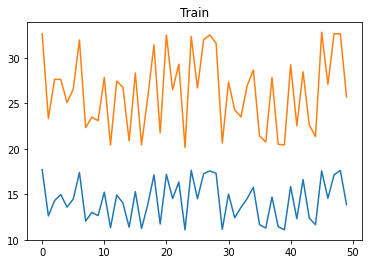

2/2 [==============================] - 0s 32ms/step


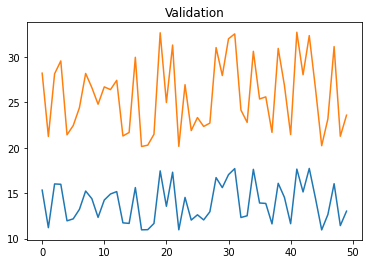

3/3 [==============================] - 0s 14ms/step


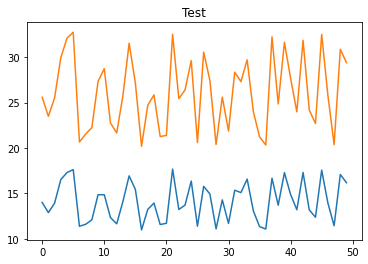

3/3 [==============================] - 0s 6ms/step


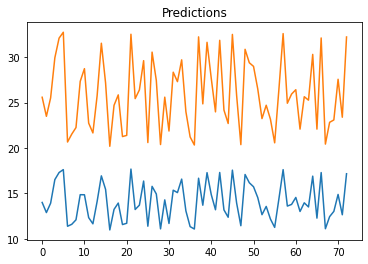

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 611.6046 - root_mean_squared_error: 24.7306

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 70s 7s/step - loss: 611.6046 - root_mean_squared_error: 24.7306 - val_loss: 639.2938 - val_root_mean_squared_error: 25.2843
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 615.2694 - root_mean_squared_error: 24.8046

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 606.0304 - root_mean_squared_error: 24.6177 - val_loss: 633.6315 - val_root_mean_squared_error: 25.1720
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 592.8917 - root_mean_squared_error: 24.3494

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 600.4765 - root_mean_squared_error: 24.5046 - val_loss: 628.0200 - val_root_mean_squared_error: 25.0603
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 594.9698 - root_mean_squared_error: 24.3920

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 594.9698 - root_mean_squared_error: 24.3920 - val_loss: 622.4415 - val_root_mean_squared_error: 24.9488
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 594.0397 - root_mean_squared_error: 24.3729

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 589.5080 - root_mean_squared_error: 24.2798 - val_loss: 616.8852 - val_root_mean_squared_error: 24.8372
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 583.4780 - root_mean_squared_error: 24.1553

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 584.0730 - root_mean_squared_error: 24.1676 - val_loss: 611.3566 - val_root_mean_squared_error: 24.7256
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 578.6329 - root_mean_squared_error: 24.0548

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 578.6329 - root_mean_squared_error: 24.0548 - val_loss: 605.8682 - val_root_mean_squared_error: 24.6144
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 573.0850 - root_mean_squared_error: 23.9392

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 573.2635 - root_mean_squared_error: 23.9429 - val_loss: 600.3801 - val_root_mean_squared_error: 24.5027
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 555.3963 - root_mean_squared_error: 23.5668

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 567.8795 - root_mean_squared_error: 23.8302 - val_loss: 594.9240 - val_root_mean_squared_error: 24.3911
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 561.8972 - root_mean_squared_error: 23.7044

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 562.5216 - root_mean_squared_error: 23.7175 - val_loss: 589.4960 - val_root_mean_squared_error: 24.2795
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 557.2001 - root_mean_squared_error: 23.6051

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 557.2001 - root_mean_squared_error: 23.6051 - val_loss: 584.0781 - val_root_mean_squared_error: 24.1677
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 551.8798 - root_mean_squared_error: 23.4921

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 551.8798 - root_mean_squared_error: 23.4921 - val_loss: 578.6653 - val_root_mean_squared_error: 24.0555
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 536.4662 - root_mean_squared_error: 23.1617

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 546.5548 - root_mean_squared_error: 23.3785 - val_loss: 573.2607 - val_root_mean_squared_error: 23.9429
Epoch 14/30
5/8 [=================>............] - ETA: 0s - loss: 551.0779 - root_mean_squared_error: 23.4750

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 541.2691 - root_mean_squared_error: 23.2652 - val_loss: 567.8344 - val_root_mean_squared_error: 23.8293
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 511.9229 - root_mean_squared_error: 22.6257

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 535.9261 - root_mean_squared_error: 23.1501 - val_loss: 562.4169 - val_root_mean_squared_error: 23.7153
Epoch 16/30
5/8 [=================>............] - ETA: 0s - loss: 525.6176 - root_mean_squared_error: 22.9264

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 530.5874 - root_mean_squared_error: 23.0345 - val_loss: 556.9816 - val_root_mean_squared_error: 23.6005
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 517.1810 - root_mean_squared_error: 22.7416

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 525.2195 - root_mean_squared_error: 22.9177 - val_loss: 551.5046 - val_root_mean_squared_error: 23.4841
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 525.1721 - root_mean_squared_error: 22.9166

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 519.8156 - root_mean_squared_error: 22.7995 - val_loss: 545.9599 - val_root_mean_squared_error: 23.3658
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 510.1497 - root_mean_squared_error: 22.5865

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 514.3324 - root_mean_squared_error: 22.6789 - val_loss: 540.3451 - val_root_mean_squared_error: 23.2453
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 485.3752 - root_mean_squared_error: 22.0312

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 508.7814 - root_mean_squared_error: 22.5562 - val_loss: 534.6576 - val_root_mean_squared_error: 23.1227
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 504.7732 - root_mean_squared_error: 22.4672

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 503.1369 - root_mean_squared_error: 22.4307 - val_loss: 528.9092 - val_root_mean_squared_error: 22.9980
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 502.3699 - root_mean_squared_error: 22.4136

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 497.4486 - root_mean_squared_error: 22.3036 - val_loss: 523.0403 - val_root_mean_squared_error: 22.8701
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 490.7812 - root_mean_squared_error: 22.1536

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 491.6079 - root_mean_squared_error: 22.1722 - val_loss: 517.0437 - val_root_mean_squared_error: 22.7386
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 485.6288 - root_mean_squared_error: 22.0370

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 485.6288 - root_mean_squared_error: 22.0370 - val_loss: 510.9111 - val_root_mean_squared_error: 22.6033
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 483.1200 - root_mean_squared_error: 21.9800

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 479.5157 - root_mean_squared_error: 21.8978 - val_loss: 504.5943 - val_root_mean_squared_error: 22.4632
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 473.1876 - root_mean_squared_error: 21.7529

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 473.1876 - root_mean_squared_error: 21.7529 - val_loss: 498.0950 - val_root_mean_squared_error: 22.3180
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 529.6799 - root_mean_squared_error: 23.0148

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 466.7001 - root_mean_squared_error: 21.6032 - val_loss: 491.3582 - val_root_mean_squared_error: 22.1666
Epoch 28/30
5/8 [=================>............] - ETA: 0s - loss: 448.4068 - root_mean_squared_error: 21.1756

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 459.9442 - root_mean_squared_error: 21.4463 - val_loss: 484.4138 - val_root_mean_squared_error: 22.0094
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 453.5398 - root_mean_squared_error: 21.2965

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 453.0025 - root_mean_squared_error: 21.2839 - val_loss: 477.2309 - val_root_mean_squared_error: 21.8456
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 448.0214 - root_mean_squared_error: 21.1665

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 5ms/step


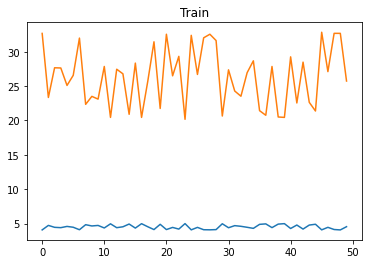

2/2 [==============================] - 2s 9ms/step


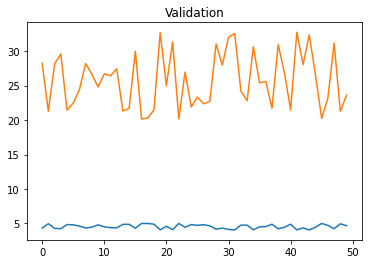

3/3 [==============================] - 0s 5ms/step


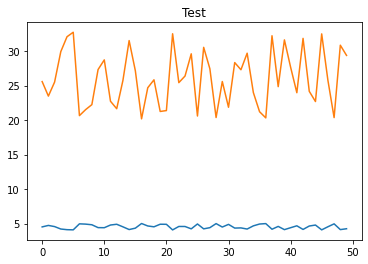

3/3 [==============================] - 0s 4ms/step


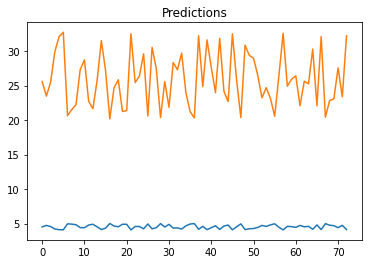

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 650.4874 - root_mean_squared_error: 25.5047  

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 32s 3s/step - loss: 650.4874 - root_mean_squared_error: 25.5047 - val_loss: 681.1645 - val_root_mean_squared_error: 26.0991
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 647.0786 - root_mean_squared_error: 25.4377

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 648.2589 - root_mean_squared_error: 25.4609 - val_loss: 678.9128 - val_root_mean_squared_error: 26.0560
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 645.6376 - root_mean_squared_error: 25.4094

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 646.0642 - root_mean_squared_error: 25.4178 - val_loss: 676.6824 - val_root_mean_squared_error: 26.0131
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 642.5524 - root_mean_squared_error: 25.3486

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 643.8841 - root_mean_squared_error: 25.3749 - val_loss: 674.4754 - val_root_mean_squared_error: 25.9707
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 638.0521 - root_mean_squared_error: 25.2597

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 641.7270 - root_mean_squared_error: 25.3323 - val_loss: 672.3829 - val_root_mean_squared_error: 25.9303
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 636.4120 - root_mean_squared_error: 25.2272

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 639.9238 - root_mean_squared_error: 25.2967 - val_loss: 670.8199 - val_root_mean_squared_error: 25.9002
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 639.7864 - root_mean_squared_error: 25.2940

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 638.4479 - root_mean_squared_error: 25.2675 - val_loss: 669.2903 - val_root_mean_squared_error: 25.8706
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 637.6784 - root_mean_squared_error: 25.2523

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 636.9335 - root_mean_squared_error: 25.2375 - val_loss: 667.7452 - val_root_mean_squared_error: 25.8408
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 642.3848 - root_mean_squared_error: 25.3453

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 635.4191 - root_mean_squared_error: 25.2075 - val_loss: 666.2189 - val_root_mean_squared_error: 25.8112
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 636.9455 - root_mean_squared_error: 25.2378

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 633.8976 - root_mean_squared_error: 25.1773 - val_loss: 664.6578 - val_root_mean_squared_error: 25.7810
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 632.3468 - root_mean_squared_error: 25.1465

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 632.3468 - root_mean_squared_error: 25.1465 - val_loss: 663.0481 - val_root_mean_squared_error: 25.7497
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 631.2258 - root_mean_squared_error: 25.1242

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 630.7500 - root_mean_squared_error: 25.1147 - val_loss: 661.4014 - val_root_mean_squared_error: 25.7177
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 629.1189 - root_mean_squared_error: 25.0822

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 629.1189 - root_mean_squared_error: 25.0822 - val_loss: 659.7116 - val_root_mean_squared_error: 25.6849
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 624.8307 - root_mean_squared_error: 24.9966

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 627.4451 - root_mean_squared_error: 25.0489 - val_loss: 657.9758 - val_root_mean_squared_error: 25.6510
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 625.7272 - root_mean_squared_error: 25.0145

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 625.7272 - root_mean_squared_error: 25.0145 - val_loss: 656.1894 - val_root_mean_squared_error: 25.6162
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 619.3834 - root_mean_squared_error: 24.8874

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 623.9495 - root_mean_squared_error: 24.9790 - val_loss: 654.3625 - val_root_mean_squared_error: 25.5805
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 622.1384 - root_mean_squared_error: 24.9427

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 622.1384 - root_mean_squared_error: 24.9427 - val_loss: 652.4642 - val_root_mean_squared_error: 25.5434
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 619.4087 - root_mean_squared_error: 24.8879

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 620.2573 - root_mean_squared_error: 24.9050 - val_loss: 650.5182 - val_root_mean_squared_error: 25.5053
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 611.9197 - root_mean_squared_error: 24.7370

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 618.3290 - root_mean_squared_error: 24.8662 - val_loss: 648.5293 - val_root_mean_squared_error: 25.4662
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 681.9062 - root_mean_squared_error: 26.1133

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 616.3608 - root_mean_squared_error: 24.8266 - val_loss: 646.4891 - val_root_mean_squared_error: 25.4261
Epoch 21/30
5/8 [=================>............] - ETA: 0s - loss: 608.9996 - root_mean_squared_error: 24.6779

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 614.3366 - root_mean_squared_error: 24.7858 - val_loss: 644.4109 - val_root_mean_squared_error: 25.3853
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 613.1536 - root_mean_squared_error: 24.7619

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 612.2714 - root_mean_squared_error: 24.7441 - val_loss: 642.2866 - val_root_mean_squared_error: 25.3434
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 610.5864 - root_mean_squared_error: 24.7100

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 610.1615 - root_mean_squared_error: 24.7014 - val_loss: 640.1152 - val_root_mean_squared_error: 25.3005
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 574.1530 - root_mean_squared_error: 23.9615

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 607.6725 - root_mean_squared_error: 24.6510 - val_loss: 635.6313 - val_root_mean_squared_error: 25.2117
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 601.6458 - root_mean_squared_error: 24.5285

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 601.6458 - root_mean_squared_error: 24.5285 - val_loss: 627.9444 - val_root_mean_squared_error: 25.0588
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 592.6801 - root_mean_squared_error: 24.3450

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 593.8820 - root_mean_squared_error: 24.3697 - val_loss: 620.0110 - val_root_mean_squared_error: 24.9000
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 583.3105 - root_mean_squared_error: 24.1518

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 586.1376 - root_mean_squared_error: 24.2103 - val_loss: 612.2290 - val_root_mean_squared_error: 24.7433
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 577.1307 - root_mean_squared_error: 24.0235

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 578.6593 - root_mean_squared_error: 24.0553 - val_loss: 604.8075 - val_root_mean_squared_error: 24.5928
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 571.4979 - root_mean_squared_error: 23.9060

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 571.4979 - root_mean_squared_error: 23.9060 - val_loss: 597.6530 - val_root_mean_squared_error: 24.4469
Epoch 30/30
5/8 [=================>............] - ETA: 0s - loss: 567.3287 - root_mean_squared_error: 23.8187

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 8ms/step


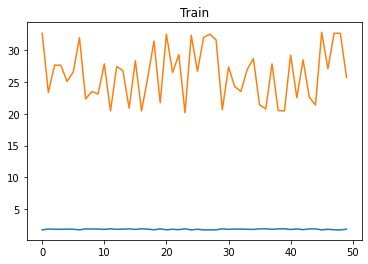

2/2 [==============================] - 3s 10ms/step


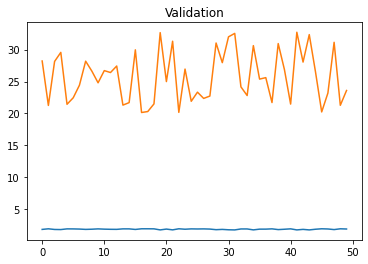

3/3 [==============================] - 0s 50ms/step


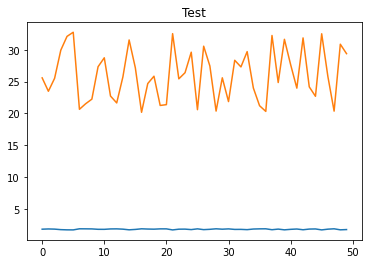

3/3 [==============================] - 0s 16ms/step


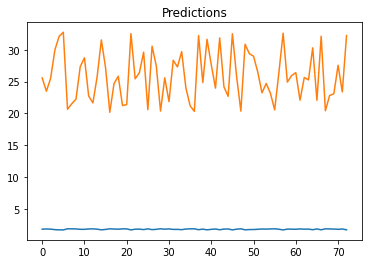

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 525.6204 - root_mean_squared_error: 22.9264 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 522.7115 - root_mean_squared_error: 22.8629 - val_loss: 547.1858 - val_root_mean_squared_error: 23.3920
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 515.9026 - root_mean_squared_error: 22.7135INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 829ms/step - loss: 515.5157 - root_mean_squared_error: 22.7050 - val_loss: 539.9474 - val_root_mean_squared_error: 23.2368
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 514.3887 - root_mean_squared_error: 22.6801INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 978ms/step - loss: 508.5482 - root_mean_squared_error: 22.5510 - val_loss: 532.9211 - val_root_mean_squared_error: 23.0851
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 503.4437 - root_mean_squared_error: 22.4375INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 731ms/step - loss: 501.7614 - root_mean_squared_error: 22.4000 - val_loss: 526.0753 - val_root_mean_squared_error: 22.9363
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 465.4080 - root_mean_squared_error: 21.5733INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 495.1465 - root_mean_squared_error: 22.2519 - val_loss: 519.3616 - val_root_mean_squared_error: 22.7895
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 491.9674 - root_mean_squared_error: 22.1803INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 488.6414 - root_mean_squared_error: 22.1052 - val_loss: 512.7568 - val_root_mean_squared_error: 22.6441
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 542.1725 - root_mean_squared_error: 23.2846INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 710ms/step - loss: 482.2407 - root_mean_squared_error: 21.9600 - val_loss: 506.2307 - val_root_mean_squared_error: 22.4996
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 475.8493 - root_mean_squared_error: 21.8140INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 697ms/step - loss: 475.8493 - root_mean_squared_error: 21.8140 - val_loss: 499.7112 - val_root_mean_squared_error: 22.3542
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 460.9890 - root_mean_squared_error: 21.4707INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 726ms/step - loss: 469.4700 - root_mean_squared_error: 21.6673 - val_loss: 493.2150 - val_root_mean_squared_error: 22.2084
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 447.7767 - root_mean_squared_error: 21.1607INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 958ms/step - loss: 463.1483 - root_mean_squared_error: 21.5209 - val_loss: 486.6851 - val_root_mean_squared_error: 22.0609
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 454.3064 - root_mean_squared_error: 21.3145INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 832ms/step - loss: 456.7402 - root_mean_squared_error: 21.3715 - val_loss: 480.1273 - val_root_mean_squared_error: 21.9118
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 443.0089 - root_mean_squared_error: 21.0478INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 756ms/step - loss: 450.2539 - root_mean_squared_error: 21.2192 - val_loss: 473.4638 - val_root_mean_squared_error: 21.7592
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 421.6446 - root_mean_squared_error: 20.5340INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 816ms/step - loss: 443.6874 - root_mean_squared_error: 21.0639 - val_loss: 466.6958 - val_root_mean_squared_error: 21.6031
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 433.9473 - root_mean_squared_error: 20.8314INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 437.0316 - root_mean_squared_error: 20.9053 - val_loss: 459.8623 - val_root_mean_squared_error: 21.4444
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 430.3500 - root_mean_squared_error: 20.7449INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 861ms/step - loss: 430.3500 - root_mean_squared_error: 20.7449 - val_loss: 453.0027 - val_root_mean_squared_error: 21.2839
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 423.2090 - root_mean_squared_error: 20.5720INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 974ms/step - loss: 423.6426 - root_mean_squared_error: 20.5826 - val_loss: 446.1775 - val_root_mean_squared_error: 21.1229
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 450.4507 - root_mean_squared_error: 21.2238INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 637ms/step - loss: 417.0426 - root_mean_squared_error: 20.4216 - val_loss: 439.4395 - val_root_mean_squared_error: 20.9628
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 410.6881 - root_mean_squared_error: 20.2654INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 889ms/step - loss: 410.5065 - root_mean_squared_error: 20.2610 - val_loss: 432.9329 - val_root_mean_squared_error: 20.8070
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 392.2180 - root_mean_squared_error: 19.8045INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 773ms/step - loss: 404.2485 - root_mean_squared_error: 20.1059 - val_loss: 426.6012 - val_root_mean_squared_error: 20.6543
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 394.7363 - root_mean_squared_error: 19.8680INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 748ms/step - loss: 398.1618 - root_mean_squared_error: 19.9540 - val_loss: 420.4967 - val_root_mean_squared_error: 20.5060
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 392.3184 - root_mean_squared_error: 19.8070INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 664ms/step - loss: 392.3184 - root_mean_squared_error: 19.8070 - val_loss: 414.6334 - val_root_mean_squared_error: 20.3625
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 368.0909 - root_mean_squared_error: 19.1857INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 386.7668 - root_mean_squared_error: 19.6664 - val_loss: 409.0623 - val_root_mean_squared_error: 20.2253
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 471.0704 - root_mean_squared_error: 21.7042INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 558ms/step - loss: 381.5171 - root_mean_squared_error: 19.5325 - val_loss: 403.8033 - val_root_mean_squared_error: 20.0949
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 401.2191 - root_mean_squared_error: 20.0305INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 514ms/step - loss: 376.5249 - root_mean_squared_error: 19.4042 - val_loss: 398.7887 - val_root_mean_squared_error: 19.9697
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 393.9189 - root_mean_squared_error: 19.8474INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 549ms/step - loss: 371.7798 - root_mean_squared_error: 19.2816 - val_loss: 394.0195 - val_root_mean_squared_error: 19.8499
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 367.2873 - root_mean_squared_error: 19.1647INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 768ms/step - loss: 367.2873 - root_mean_squared_error: 19.1647 - val_loss: 389.4766 - val_root_mean_squared_error: 19.7352
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 361.1342 - root_mean_squared_error: 19.0035INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 632ms/step - loss: 363.0076 - root_mean_squared_error: 19.0528 - val_loss: 385.1218 - val_root_mean_squared_error: 19.6245
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 358.7922 - root_mean_squared_error: 18.9418INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 705ms/step - loss: 358.8686 - root_mean_squared_error: 18.9438 - val_loss: 380.9444 - val_root_mean_squared_error: 19.5178
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 345.6364 - root_mean_squared_error: 18.5913INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 609ms/step - loss: 354.8830 - root_mean_squared_error: 18.8383 - val_loss: 376.8719 - val_root_mean_squared_error: 19.4132
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 347.0707 - root_mean_squared_error: 18.6298INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 5ms/step


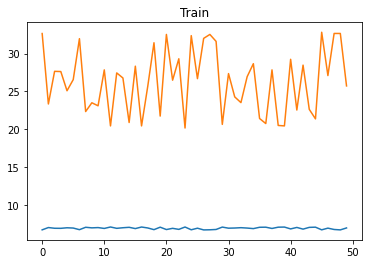

2/2 [==============================] - 1s 5ms/step


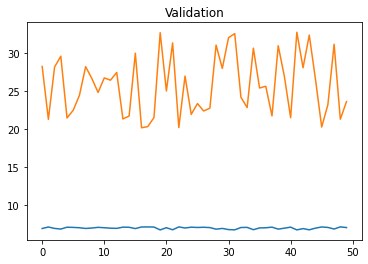

3/3 [==============================] - 0s 6ms/step


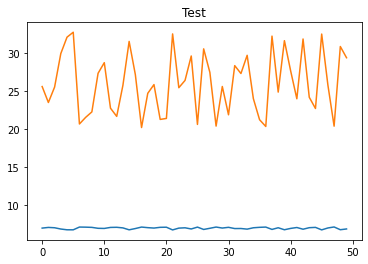

3/3 [==============================] - 0s 4ms/step


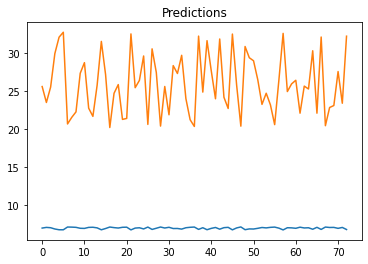

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/30
1/8 [==>...........................] - ETA: 10s - loss: 704.8064 - root_mean_squared_error: 26.5482

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 388ms/step - loss: 698.1214 - root_mean_squared_error: 26.4220 - val_loss: 704.5441 - val_root_mean_squared_error: 26.5432
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 652.5334 - root_mean_squared_error: 25.5447

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 311ms/step - loss: 652.5334 - root_mean_squared_error: 25.5447 - val_loss: 658.4283 - val_root_mean_squared_error: 25.6599
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 614.5281 - root_mean_squared_error: 24.7897

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 300ms/step - loss: 612.2031 - root_mean_squared_error: 24.7427 - val_loss: 617.9065 - val_root_mean_squared_error: 24.8577
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 618.6729 - root_mean_squared_error: 24.8731

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 260ms/step - loss: 575.0767 - root_mean_squared_error: 23.9808 - val_loss: 579.1697 - val_root_mean_squared_error: 24.0659
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 517.0763 - root_mean_squared_error: 22.7393

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 250ms/step - loss: 539.0881 - root_mean_squared_error: 23.2183 - val_loss: 543.3377 - val_root_mean_squared_error: 23.3096
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 574.8276 - root_mean_squared_error: 23.9756

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 510.6619 - root_mean_squared_error: 22.5978 - val_loss: 520.8871 - val_root_mean_squared_error: 22.8230
Epoch 7/30
1/8 [==>...........................] - ETA: 7s - loss: 535.4188 - root_mean_squared_error: 23.1391

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 568ms/step - loss: 489.8660 - root_mean_squared_error: 22.1329 - val_loss: 498.7808 - val_root_mean_squared_error: 22.3334
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 476.2373 - root_mean_squared_error: 21.8229

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 364ms/step - loss: 469.2664 - root_mean_squared_error: 21.6626 - val_loss: 477.1505 - val_root_mean_squared_error: 21.8438
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 449.2500 - root_mean_squared_error: 21.1955

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 374ms/step - loss: 449.2500 - root_mean_squared_error: 21.1955 - val_loss: 456.3054 - val_root_mean_squared_error: 21.3613
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 435.3378 - root_mean_squared_error: 20.8647

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 262ms/step - loss: 430.5189 - root_mean_squared_error: 20.7489 - val_loss: 437.6687 - val_root_mean_squared_error: 20.9205
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 429.9167 - root_mean_squared_error: 20.7344

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 350ms/step - loss: 413.4161 - root_mean_squared_error: 20.3326 - val_loss: 419.8838 - val_root_mean_squared_error: 20.4911
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 418.8685 - root_mean_squared_error: 20.4663

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 357ms/step - loss: 397.0399 - root_mean_squared_error: 19.9259 - val_loss: 402.4632 - val_root_mean_squared_error: 20.0615
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 385.6482 - root_mean_squared_error: 19.6379

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 409ms/step - loss: 380.8085 - root_mean_squared_error: 19.5143 - val_loss: 385.4346 - val_root_mean_squared_error: 19.6325
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 361.7285 - root_mean_squared_error: 19.0192

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 358ms/step - loss: 365.0363 - root_mean_squared_error: 19.1059 - val_loss: 368.9938 - val_root_mean_squared_error: 19.2092
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 348.0645 - root_mean_squared_error: 18.6565

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 349.8438 - root_mean_squared_error: 18.7041 - val_loss: 353.1714 - val_root_mean_squared_error: 18.7929
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 368.8430 - root_mean_squared_error: 19.2053

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 400ms/step - loss: 335.1111 - root_mean_squared_error: 18.3060 - val_loss: 337.5602 - val_root_mean_squared_error: 18.3728
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 317.7169 - root_mean_squared_error: 17.8246

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 369ms/step - loss: 320.5151 - root_mean_squared_error: 17.9029 - val_loss: 322.2514 - val_root_mean_squared_error: 17.9514
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 304.4175 - root_mean_squared_error: 17.4476

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 563ms/step - loss: 306.3087 - root_mean_squared_error: 17.5017 - val_loss: 307.2881 - val_root_mean_squared_error: 17.5296
Epoch 19/30
4/8 [==============>...............] - ETA: 0s - loss: 293.6714 - root_mean_squared_error: 17.1368

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 511ms/step - loss: 292.4673 - root_mean_squared_error: 17.1017 - val_loss: 292.7441 - val_root_mean_squared_error: 17.1098
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 278.9050 - root_mean_squared_error: 16.7004

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 358ms/step - loss: 278.9050 - root_mean_squared_error: 16.7004 - val_loss: 278.4896 - val_root_mean_squared_error: 16.6880
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 294.3455 - root_mean_squared_error: 17.1565

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 437ms/step - loss: 265.8271 - root_mean_squared_error: 16.3042 - val_loss: 264.6720 - val_root_mean_squared_error: 16.2687
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 277.5214 - root_mean_squared_error: 16.6590

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 323ms/step - loss: 252.9796 - root_mean_squared_error: 15.9053 - val_loss: 251.2200 - val_root_mean_squared_error: 15.8499
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 274.1555 - root_mean_squared_error: 16.5576

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 406ms/step - loss: 240.8875 - root_mean_squared_error: 15.5206 - val_loss: 239.1046 - val_root_mean_squared_error: 15.4630
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 226.4450 - root_mean_squared_error: 15.0481

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 717ms/step - loss: 229.6632 - root_mean_squared_error: 15.1546 - val_loss: 227.3904 - val_root_mean_squared_error: 15.0795
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 218.7136 - root_mean_squared_error: 14.7890

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 438ms/step - loss: 218.7136 - root_mean_squared_error: 14.7890 - val_loss: 215.9258 - val_root_mean_squared_error: 14.6944
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 255.2536 - root_mean_squared_error: 15.9767

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 338ms/step - loss: 208.2139 - root_mean_squared_error: 14.4296 - val_loss: 204.7865 - val_root_mean_squared_error: 14.3104
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 191.3037 - root_mean_squared_error: 13.8313

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 407ms/step - loss: 197.7726 - root_mean_squared_error: 14.0632 - val_loss: 193.9359 - val_root_mean_squared_error: 13.9261
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 202.9788 - root_mean_squared_error: 14.2471

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 317ms/step - loss: 187.7034 - root_mean_squared_error: 13.7005 - val_loss: 183.3093 - val_root_mean_squared_error: 13.5392
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 177.8620 - root_mean_squared_error: 13.3365

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 339ms/step - loss: 177.8620 - root_mean_squared_error: 13.3365 - val_loss: 173.1868 - val_root_mean_squared_error: 13.1600
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 166.1869 - root_mean_squared_error: 12.8913

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 5ms/step


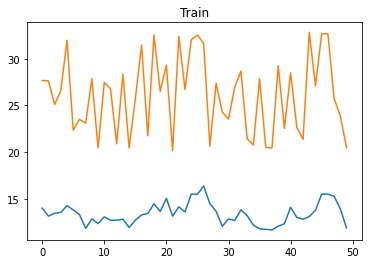

2/2 [==============================] - 0s 5ms/step


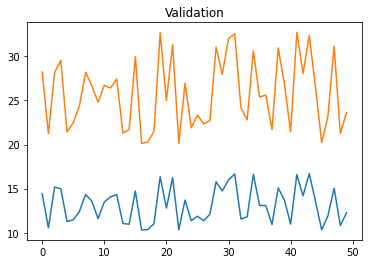

3/3 [==============================] - 0s 4ms/step


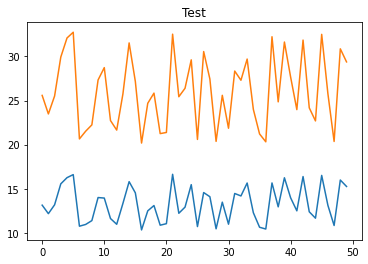

3/3 [==============================] - 0s 5ms/step


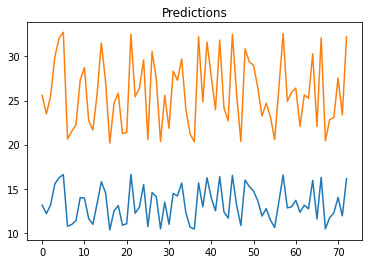

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 599.8716 - root_mean_squared_error: 24.4923  

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 3s/step - loss: 599.8716 - root_mean_squared_error: 24.4923 - val_loss: 628.9065 - val_root_mean_squared_error: 25.0780
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 585.8934 - root_mean_squared_error: 24.2052

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 595.3901 - root_mean_squared_error: 24.4006 - val_loss: 624.3956 - val_root_mean_squared_error: 24.9879
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 590.9357 - root_mean_squared_error: 24.3092

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 590.9357 - root_mean_squared_error: 24.3092 - val_loss: 619.9165 - val_root_mean_squared_error: 24.8981
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 586.5089 - root_mean_squared_error: 24.2179

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 586.5089 - root_mean_squared_error: 24.2179 - val_loss: 615.4761 - val_root_mean_squared_error: 24.8088
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 572.6299 - root_mean_squared_error: 23.9297

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 582.0907 - root_mean_squared_error: 24.1266 - val_loss: 611.0451 - val_root_mean_squared_error: 24.7193
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 579.8171 - root_mean_squared_error: 24.0794

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 577.6948 - root_mean_squared_error: 24.0353 - val_loss: 606.6413 - val_root_mean_squared_error: 24.6301
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 573.8130 - root_mean_squared_error: 23.9544

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 573.3535 - root_mean_squared_error: 23.9448 - val_loss: 602.2520 - val_root_mean_squared_error: 24.5408
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 553.4283 - root_mean_squared_error: 23.5251

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 568.9705 - root_mean_squared_error: 23.8531 - val_loss: 597.8708 - val_root_mean_squared_error: 24.4514
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 564.6320 - root_mean_squared_error: 23.7620

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 564.6320 - root_mean_squared_error: 23.7620 - val_loss: 593.4753 - val_root_mean_squared_error: 24.3613
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 561.9718 - root_mean_squared_error: 23.7059

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 560.2619 - root_mean_squared_error: 23.6699 - val_loss: 589.0870 - val_root_mean_squared_error: 24.2711
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 556.1476 - root_mean_squared_error: 23.5828

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 555.9009 - root_mean_squared_error: 23.5776 - val_loss: 584.7064 - val_root_mean_squared_error: 24.1807
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 546.4917 - root_mean_squared_error: 23.3772

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 551.5399 - root_mean_squared_error: 23.4849 - val_loss: 580.3124 - val_root_mean_squared_error: 24.0897
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 547.1525 - root_mean_squared_error: 23.3913

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 547.1525 - root_mean_squared_error: 23.3913 - val_loss: 575.8768 - val_root_mean_squared_error: 23.9974
Epoch 14/30
5/8 [=================>............] - ETA: 0s - loss: 555.7204 - root_mean_squared_error: 23.5737

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 542.7454 - root_mean_squared_error: 23.2969 - val_loss: 571.4055 - val_root_mean_squared_error: 23.9041
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 535.0284 - root_mean_squared_error: 23.1307

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 538.2584 - root_mean_squared_error: 23.2004 - val_loss: 566.8826 - val_root_mean_squared_error: 23.8093
Epoch 16/30
4/8 [==============>...............] - ETA: 0s - loss: 522.6489 - root_mean_squared_error: 22.8615

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 533.7145 - root_mean_squared_error: 23.1023 - val_loss: 562.3015 - val_root_mean_squared_error: 23.7129
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 552.1494 - root_mean_squared_error: 23.4979

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 529.1453 - root_mean_squared_error: 23.0032 - val_loss: 557.6500 - val_root_mean_squared_error: 23.6146
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 524.3423 - root_mean_squared_error: 22.8985

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 524.4798 - root_mean_squared_error: 22.9015 - val_loss: 552.9299 - val_root_mean_squared_error: 23.5145
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 519.7302 - root_mean_squared_error: 22.7976

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 519.7302 - root_mean_squared_error: 22.7976 - val_loss: 548.1196 - val_root_mean_squared_error: 23.4120
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 508.5565 - root_mean_squared_error: 22.5512

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 514.8870 - root_mean_squared_error: 22.6911 - val_loss: 543.1984 - val_root_mean_squared_error: 23.3066
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 484.7057 - root_mean_squared_error: 22.0160

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 509.9621 - root_mean_squared_error: 22.5823 - val_loss: 538.1599 - val_root_mean_squared_error: 23.1983
Epoch 22/30
4/8 [==============>...............] - ETA: 0s - loss: 507.1451 - root_mean_squared_error: 22.5199

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 504.8805 - root_mean_squared_error: 22.4695 - val_loss: 533.0044 - val_root_mean_squared_error: 23.0869
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 499.6937 - root_mean_squared_error: 22.3538

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 499.6937 - root_mean_squared_error: 22.3538 - val_loss: 527.6860 - val_root_mean_squared_error: 22.9714
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 496.7262 - root_mean_squared_error: 22.2874

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 494.3475 - root_mean_squared_error: 22.2339 - val_loss: 522.2263 - val_root_mean_squared_error: 22.8523
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 489.8312 - root_mean_squared_error: 22.1321

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 488.8443 - root_mean_squared_error: 22.1098 - val_loss: 516.6577 - val_root_mean_squared_error: 22.7301
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 483.5536 - root_mean_squared_error: 21.9899

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 483.2123 - root_mean_squared_error: 21.9821 - val_loss: 510.9096 - val_root_mean_squared_error: 22.6033
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 477.4286 - root_mean_squared_error: 21.8501

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 477.4286 - root_mean_squared_error: 21.8501 - val_loss: 504.9514 - val_root_mean_squared_error: 22.4711
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 478.7076 - root_mean_squared_error: 21.8794

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 471.4005 - root_mean_squared_error: 21.7118 - val_loss: 498.7992 - val_root_mean_squared_error: 22.3338
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 465.1887 - root_mean_squared_error: 21.5682

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 465.1887 - root_mean_squared_error: 21.5682 - val_loss: 492.4679 - val_root_mean_squared_error: 22.1916
Epoch 30/30
4/8 [==============>...............] - ETA: 0s - loss: 451.1474 - root_mean_squared_error: 21.2402

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 6s 10ms/step


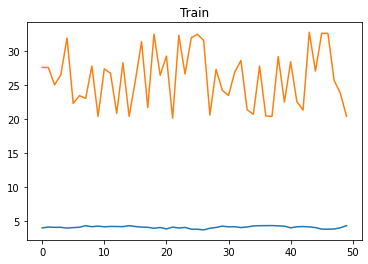

2/2 [==============================] - 1s 8ms/step


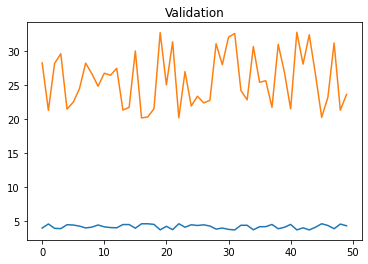

3/3 [==============================] - 0s 8ms/step


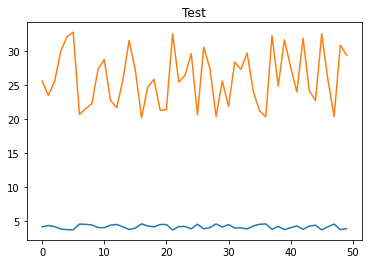

3/3 [==============================] - 0s 5ms/step


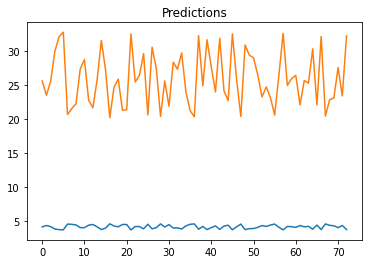

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 627.5291 - root_mean_squared_error: 25.0505 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 38s 4s/step - loss: 627.5291 - root_mean_squared_error: 25.0505 - val_loss: 658.0638 - val_root_mean_squared_error: 25.6528
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 626.4323 - root_mean_squared_error: 25.0286

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 623.6917 - root_mean_squared_error: 24.9738 - val_loss: 654.0914 - val_root_mean_squared_error: 25.5752
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 619.7643 - root_mean_squared_error: 24.8951

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 619.7643 - root_mean_squared_error: 24.8951 - val_loss: 650.0460 - val_root_mean_squared_error: 25.4960
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 615.7748 - root_mean_squared_error: 24.8148

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 615.7748 - root_mean_squared_error: 24.8148 - val_loss: 645.9318 - val_root_mean_squared_error: 25.4152
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 611.7225 - root_mean_squared_error: 24.7330

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 611.7225 - root_mean_squared_error: 24.7330 - val_loss: 641.7726 - val_root_mean_squared_error: 25.3332
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 607.6199 - root_mean_squared_error: 24.6499

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 607.6199 - root_mean_squared_error: 24.6499 - val_loss: 637.5434 - val_root_mean_squared_error: 25.2496
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 604.3953 - root_mean_squared_error: 24.5845

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 603.4473 - root_mean_squared_error: 24.5652 - val_loss: 633.2161 - val_root_mean_squared_error: 25.1638
Epoch 8/30
3/8 [==========>...................] - ETA: 0s - loss: 595.5143 - root_mean_squared_error: 24.4032

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 599.1501 - root_mean_squared_error: 24.4775 - val_loss: 628.7992 - val_root_mean_squared_error: 25.0759
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 591.4352 - root_mean_squared_error: 24.3194

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 594.7742 - root_mean_squared_error: 24.3880 - val_loss: 624.2681 - val_root_mean_squared_error: 24.9854
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 593.1755 - root_mean_squared_error: 24.3552

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 590.2813 - root_mean_squared_error: 24.2957 - val_loss: 619.6060 - val_root_mean_squared_error: 24.8919
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 595.2263 - root_mean_squared_error: 24.3973

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 585.6638 - root_mean_squared_error: 24.2005 - val_loss: 614.8442 - val_root_mean_squared_error: 24.7961
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 576.7750 - root_mean_squared_error: 24.0161

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 580.9068 - root_mean_squared_error: 24.1020 - val_loss: 609.9672 - val_root_mean_squared_error: 24.6975
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 582.3678 - root_mean_squared_error: 24.1323

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 576.0469 - root_mean_squared_error: 24.0010 - val_loss: 604.9231 - val_root_mean_squared_error: 24.5952
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 577.5367 - root_mean_squared_error: 24.0320

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 571.0073 - root_mean_squared_error: 23.8958 - val_loss: 599.7185 - val_root_mean_squared_error: 24.4892
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 560.6517 - root_mean_squared_error: 23.6781

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 565.8109 - root_mean_squared_error: 23.7868 - val_loss: 594.3563 - val_root_mean_squared_error: 24.3794
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 560.4279 - root_mean_squared_error: 23.6734

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 560.4279 - root_mean_squared_error: 23.6734 - val_loss: 588.8220 - val_root_mean_squared_error: 24.2657
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 554.9150 - root_mean_squared_error: 23.5566

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 554.9150 - root_mean_squared_error: 23.5566 - val_loss: 583.1022 - val_root_mean_squared_error: 24.1475
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 541.6343 - root_mean_squared_error: 23.2730

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 549.1893 - root_mean_squared_error: 23.4348 - val_loss: 577.2084 - val_root_mean_squared_error: 24.0252
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 544.4160 - root_mean_squared_error: 23.3327

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 543.2935 - root_mean_squared_error: 23.3087 - val_loss: 571.0598 - val_root_mean_squared_error: 23.8969
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 537.7302 - root_mean_squared_error: 23.1890

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 537.0855 - root_mean_squared_error: 23.1751 - val_loss: 564.5257 - val_root_mean_squared_error: 23.7598
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 530.4263 - root_mean_squared_error: 23.0310

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 530.4263 - root_mean_squared_error: 23.0310 - val_loss: 557.5909 - val_root_mean_squared_error: 23.6134
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 523.1478 - root_mean_squared_error: 22.8724

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 523.4128 - root_mean_squared_error: 22.8782 - val_loss: 550.3130 - val_root_mean_squared_error: 23.4588
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 515.4760 - root_mean_squared_error: 22.7041

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 516.0440 - root_mean_squared_error: 22.7166 - val_loss: 542.6994 - val_root_mean_squared_error: 23.2959
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 508.3731 - root_mean_squared_error: 22.5471

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 508.3731 - root_mean_squared_error: 22.5471 - val_loss: 534.7454 - val_root_mean_squared_error: 23.1246
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 479.7108 - root_mean_squared_error: 21.9023

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 500.3915 - root_mean_squared_error: 22.3694 - val_loss: 526.5233 - val_root_mean_squared_error: 22.9461
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 482.7151 - root_mean_squared_error: 21.9708

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 492.1727 - root_mean_squared_error: 22.1850 - val_loss: 518.0439 - val_root_mean_squared_error: 22.7606
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 452.9127 - root_mean_squared_error: 21.2817

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 483.7387 - root_mean_squared_error: 21.9941 - val_loss: 509.3875 - val_root_mean_squared_error: 22.5696
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 477.1702 - root_mean_squared_error: 21.8442

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 475.1906 - root_mean_squared_error: 21.7989 - val_loss: 500.5813 - val_root_mean_squared_error: 22.3737
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 462.1250 - root_mean_squared_error: 21.4971

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 466.4847 - root_mean_squared_error: 21.5983 - val_loss: 491.6042 - val_root_mean_squared_error: 22.1721
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 456.7591 - root_mean_squared_error: 21.3719

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 2s 9ms/step


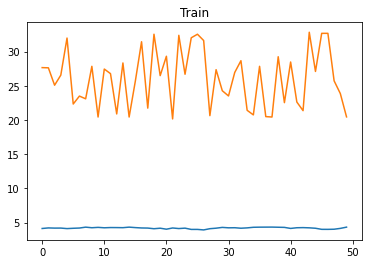

2/2 [==============================] - 1s 5ms/step


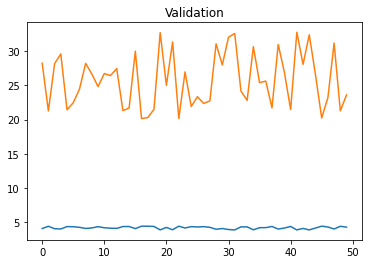

3/3 [==============================] - 0s 6ms/step


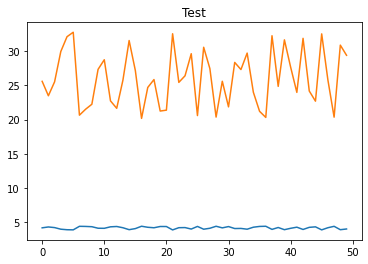

3/3 [==============================] - 0s 4ms/step


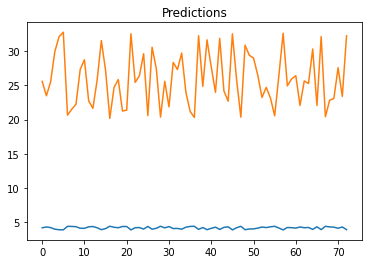

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/30
1/8 [==>...........................] - ETA: 26s - loss: 629.3273 - root_mean_squared_error: 25.0864INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 798ms/step - loss: 629.4030 - root_mean_squared_error: 25.0879 - val_loss: 659.3917 - val_root_mean_squared_error: 25.6786
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 624.2293 - root_mean_squared_error: 24.9846INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 987ms/step - loss: 624.7568 - root_mean_squared_error: 24.9951 - val_loss: 654.6603 - val_root_mean_squared_error: 25.5863
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 639.9948 - root_mean_squared_error: 25.2981INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 723ms/step - loss: 620.1830 - root_mean_squared_error: 24.9035 - val_loss: 649.9998 - val_root_mean_squared_error: 25.4951
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 615.6807 - root_mean_squared_error: 24.8129INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 754ms/step - loss: 615.6807 - root_mean_squared_error: 24.8129 - val_loss: 645.4232 - val_root_mean_squared_error: 25.4052
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 617.4510 - root_mean_squared_error: 24.8486INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 715ms/step - loss: 611.2549 - root_mean_squared_error: 24.7236 - val_loss: 640.9003 - val_root_mean_squared_error: 25.3160
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 596.3635 - root_mean_squared_error: 24.4206INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 907ms/step - loss: 606.8627 - root_mean_squared_error: 24.6346 - val_loss: 636.4048 - val_root_mean_squared_error: 25.2271
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 643.1485 - root_mean_squared_error: 25.3604INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 783ms/step - loss: 602.5267 - root_mean_squared_error: 24.5464 - val_loss: 631.9448 - val_root_mean_squared_error: 25.1385
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 598.2074 - root_mean_squared_error: 24.4583INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 797ms/step - loss: 598.2074 - root_mean_squared_error: 24.4583 - val_loss: 627.5767 - val_root_mean_squared_error: 25.0515
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 595.8172 - root_mean_squared_error: 24.4094INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 862ms/step - loss: 594.0103 - root_mean_squared_error: 24.3723 - val_loss: 623.2805 - val_root_mean_squared_error: 24.9656
Epoch 10/30
4/8 [==============>...............] - ETA: 0s - loss: 590.6995 - root_mean_squared_error: 24.3043INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 589.8662 - root_mean_squared_error: 24.2872 - val_loss: 619.0385 - val_root_mean_squared_error: 24.8805
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 571.4021 - root_mean_squared_error: 23.9040INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 585.7505 - root_mean_squared_error: 24.2023 - val_loss: 614.8443 - val_root_mean_squared_error: 24.7961
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 574.7627 - root_mean_squared_error: 23.9742INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 582ms/step - loss: 581.6726 - root_mean_squared_error: 24.1179 - val_loss: 610.6367 - val_root_mean_squared_error: 24.7111
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 627.3347 - root_mean_squared_error: 25.0466INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 699ms/step - loss: 577.5894 - root_mean_squared_error: 24.0331 - val_loss: 606.3959 - val_root_mean_squared_error: 24.6251
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 605.5486 - root_mean_squared_error: 24.6079INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 573.4249 - root_mean_squared_error: 23.9463 - val_loss: 602.0939 - val_root_mean_squared_error: 24.5376
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 630.4286 - root_mean_squared_error: 25.1083INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 731ms/step - loss: 569.1677 - root_mean_squared_error: 23.8572 - val_loss: 597.6329 - val_root_mean_squared_error: 24.4465
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 521.9153 - root_mean_squared_error: 22.8455INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 716ms/step - loss: 564.6990 - root_mean_squared_error: 23.7634 - val_loss: 592.9510 - val_root_mean_squared_error: 24.3506
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 588.0594 - root_mean_squared_error: 24.2499INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 559.9672 - root_mean_squared_error: 23.6636 - val_loss: 587.9402 - val_root_mean_squared_error: 24.2475
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 529.4439 - root_mean_squared_error: 23.0096INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 554.8126 - root_mean_squared_error: 23.5545 - val_loss: 582.5293 - val_root_mean_squared_error: 24.1356
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 549.1580 - root_mean_squared_error: 23.4341INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 549.1580 - root_mean_squared_error: 23.4341 - val_loss: 576.5933 - val_root_mean_squared_error: 24.0124
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 524.9041 - root_mean_squared_error: 22.9108INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 841ms/step - loss: 542.8708 - root_mean_squared_error: 23.2996 - val_loss: 569.9929 - val_root_mean_squared_error: 23.8745
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 486.8256 - root_mean_squared_error: 22.0641INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 838ms/step - loss: 535.8221 - root_mean_squared_error: 23.1478 - val_loss: 562.7213 - val_root_mean_squared_error: 23.7217
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 531.9943 - root_mean_squared_error: 23.0650INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 698ms/step - loss: 528.0593 - root_mean_squared_error: 22.9795 - val_loss: 554.7105 - val_root_mean_squared_error: 23.5523
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 599.9758 - root_mean_squared_error: 24.4944INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 956ms/step - loss: 519.5631 - root_mean_squared_error: 22.7939 - val_loss: 545.9915 - val_root_mean_squared_error: 23.3665
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 510.3399 - root_mean_squared_error: 22.5907INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 685ms/step - loss: 510.3399 - root_mean_squared_error: 22.5907 - val_loss: 536.6256 - val_root_mean_squared_error: 23.1652
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 523.8440 - root_mean_squared_error: 22.8876INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 928ms/step - loss: 500.5075 - root_mean_squared_error: 22.3720 - val_loss: 526.6581 - val_root_mean_squared_error: 22.9490
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 490.0970 - root_mean_squared_error: 22.1381INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 490.0970 - root_mean_squared_error: 22.1381 - val_loss: 516.1229 - val_root_mean_squared_error: 22.7183
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 479.0562 - root_mean_squared_error: 21.8874INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 766ms/step - loss: 479.0562 - root_mean_squared_error: 21.8874 - val_loss: 505.0618 - val_root_mean_squared_error: 22.4736
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 467.2851 - root_mean_squared_error: 21.6168INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 467.2851 - root_mean_squared_error: 21.6168 - val_loss: 493.4070 - val_root_mean_squared_error: 22.2128
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 444.4173 - root_mean_squared_error: 21.0812INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 974ms/step - loss: 454.7350 - root_mean_squared_error: 21.3245 - val_loss: 481.2503 - val_root_mean_squared_error: 21.9374
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 412.6795 - root_mean_squared_error: 20.3145INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 8ms/step


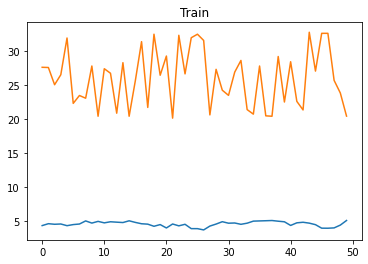

2/2 [==============================] - 1s 5ms/step


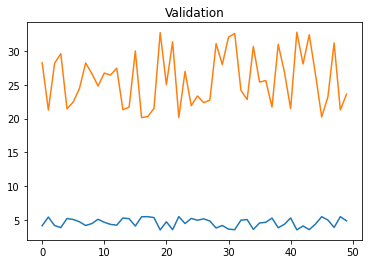

3/3 [==============================] - 0s 6ms/step


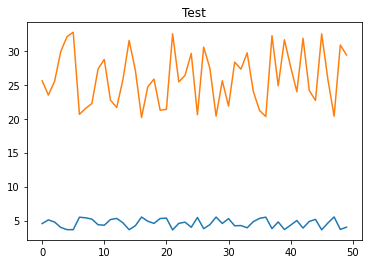

3/3 [==============================] - 0s 20ms/step


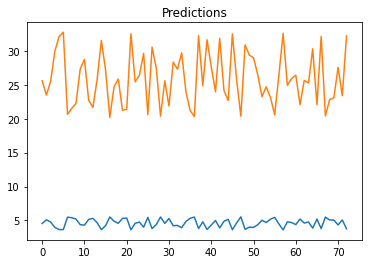

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1187.4493 - root_mean_squared_error: 34.4594 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 688ms/step - loss: 1186.9565 - root_mean_squared_error: 34.4522 - val_loss: 1035.7151 - val_root_mean_squared_error: 32.1825
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 1076.5332 - root_mean_squared_error: 32.8106

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 754ms/step - loss: 1066.5636 - root_mean_squared_error: 32.6583 - val_loss: 912.2097 - val_root_mean_squared_error: 30.2028
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 993.2593 - root_mean_squared_error: 31.5160 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 981.5634 - root_mean_squared_error: 31.3299 - val_loss: 832.6190 - val_root_mean_squared_error: 28.8551
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 919.2167 - root_mean_squared_error: 30.3186

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 591ms/step - loss: 875.4892 - root_mean_squared_error: 29.5887 - val_loss: 768.6597 - val_root_mean_squared_error: 27.7247
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 811.7031 - root_mean_squared_error: 28.4904

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 810.4401 - root_mean_squared_error: 28.4682 - val_loss: 710.7524 - val_root_mean_squared_error: 26.6599
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 752.6276 - root_mean_squared_error: 27.4341

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 422ms/step - loss: 752.6276 - root_mean_squared_error: 27.4341 - val_loss: 662.9024 - val_root_mean_squared_error: 25.7469
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 764.6365 - root_mean_squared_error: 27.6521

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 534ms/step - loss: 720.3632 - root_mean_squared_error: 26.8396 - val_loss: 652.3785 - val_root_mean_squared_error: 25.5417
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 684.2885 - root_mean_squared_error: 26.1589

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 608ms/step - loss: 684.8236 - root_mean_squared_error: 26.1691 - val_loss: 649.5790 - val_root_mean_squared_error: 25.4868
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 683.7474 - root_mean_squared_error: 26.1486

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 505ms/step - loss: 686.3359 - root_mean_squared_error: 26.1980 - val_loss: 646.7108 - val_root_mean_squared_error: 25.4305
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 677.2268 - root_mean_squared_error: 26.0236

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 567ms/step - loss: 659.7529 - root_mean_squared_error: 25.6857 - val_loss: 643.7182 - val_root_mean_squared_error: 25.3716
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 603.9094 - root_mean_squared_error: 24.5746

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 677ms/step - loss: 644.7810 - root_mean_squared_error: 25.3925 - val_loss: 640.6105 - val_root_mean_squared_error: 25.3103
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 635.0760 - root_mean_squared_error: 25.2007

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 578ms/step - loss: 640.5701 - root_mean_squared_error: 25.3095 - val_loss: 637.3107 - val_root_mean_squared_error: 25.2450
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 636.9451 - root_mean_squared_error: 25.2378

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 491ms/step - loss: 636.9451 - root_mean_squared_error: 25.2378 - val_loss: 633.8457 - val_root_mean_squared_error: 25.1763
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 686.5547 - root_mean_squared_error: 26.2022

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 539ms/step - loss: 642.0945 - root_mean_squared_error: 25.3396 - val_loss: 630.1862 - val_root_mean_squared_error: 25.1035
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 627.2263 - root_mean_squared_error: 25.0445

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 669ms/step - loss: 627.2263 - root_mean_squared_error: 25.0445 - val_loss: 626.4511 - val_root_mean_squared_error: 25.0290
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 618.4916 - root_mean_squared_error: 24.8695

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 614.6575 - root_mean_squared_error: 24.7923 - val_loss: 622.4228 - val_root_mean_squared_error: 24.9484
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 621.2361 - root_mean_squared_error: 24.9246

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 412ms/step - loss: 611.5783 - root_mean_squared_error: 24.7301 - val_loss: 618.1098 - val_root_mean_squared_error: 24.8618
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 600.6306 - root_mean_squared_error: 24.5078

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 677ms/step - loss: 601.5862 - root_mean_squared_error: 24.5273 - val_loss: 613.6310 - val_root_mean_squared_error: 24.7716
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 573.1633 - root_mean_squared_error: 23.9408

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 535ms/step - loss: 593.2148 - root_mean_squared_error: 24.3560 - val_loss: 608.9016 - val_root_mean_squared_error: 24.6759
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 591.0820 - root_mean_squared_error: 24.3122

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 586ms/step - loss: 593.0468 - root_mean_squared_error: 24.3526 - val_loss: 603.9014 - val_root_mean_squared_error: 24.5744
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 584.6524 - root_mean_squared_error: 24.1796

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 658ms/step - loss: 584.6524 - root_mean_squared_error: 24.1796 - val_loss: 598.6407 - val_root_mean_squared_error: 24.4671
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 525.2641 - root_mean_squared_error: 22.9186

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 462ms/step - loss: 575.6351 - root_mean_squared_error: 23.9924 - val_loss: 593.2235 - val_root_mean_squared_error: 24.3562
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 580.1633 - root_mean_squared_error: 24.0866

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 507ms/step - loss: 576.7485 - root_mean_squared_error: 24.0156 - val_loss: 587.5636 - val_root_mean_squared_error: 24.2397
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 568.1451 - root_mean_squared_error: 23.8358

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 739ms/step - loss: 568.1451 - root_mean_squared_error: 23.8358 - val_loss: 581.6873 - val_root_mean_squared_error: 24.1182
Epoch 25/30
5/8 [=================>............] - ETA: 0s - loss: 557.9807 - root_mean_squared_error: 23.6216

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 663ms/step - loss: 565.2698 - root_mean_squared_error: 23.7754 - val_loss: 575.5305 - val_root_mean_squared_error: 23.9902
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 555.5027 - root_mean_squared_error: 23.5691

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 551.2312 - root_mean_squared_error: 23.4783 - val_loss: 569.0643 - val_root_mean_squared_error: 23.8551
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 550.5999 - root_mean_squared_error: 23.4649

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 577ms/step - loss: 549.8948 - root_mean_squared_error: 23.4498 - val_loss: 562.3673 - val_root_mean_squared_error: 23.7143
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 538.0303 - root_mean_squared_error: 23.1955

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 596ms/step - loss: 538.7800 - root_mean_squared_error: 23.2116 - val_loss: 555.4086 - val_root_mean_squared_error: 23.5671
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 530.1457 - root_mean_squared_error: 23.0249

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 471ms/step - loss: 530.1457 - root_mean_squared_error: 23.0249 - val_loss: 548.0688 - val_root_mean_squared_error: 23.4109
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 572.1448 - root_mean_squared_error: 23.9195

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 0s 4ms/step


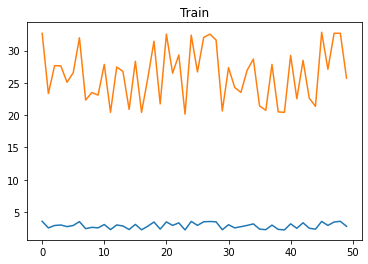

2/2 [==============================] - 1s 24ms/step


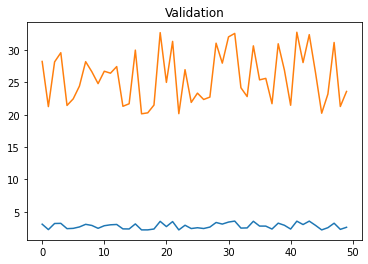

3/3 [==============================] - 0s 4ms/step


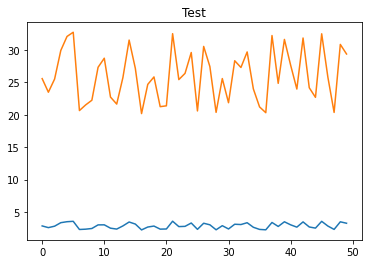

3/3 [==============================] - 0s 4ms/step


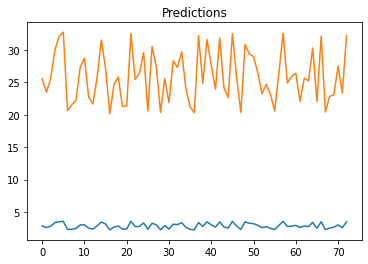

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

543.8114443957243

### GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 645.1321 - root_mean_squared_error: 25.3995  

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 47s 4s/step - loss: 644.7758 - root_mean_squared_error: 25.3924 - val_loss: 672.8146 - val_root_mean_squared_error: 25.9387
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 641.1372 - root_mean_squared_error: 25.3207

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 642.6671 - root_mean_squared_error: 25.3509 - val_loss: 667.8796 - val_root_mean_squared_error: 25.8434
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 633.3027 - root_mean_squared_error: 25.1655

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 633.3027 - root_mean_squared_error: 25.1655 - val_loss: 662.9836 - val_root_mean_squared_error: 25.7485
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 631.3592 - root_mean_squared_error: 25.1269

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 630.1238 - root_mean_squared_error: 25.1023 - val_loss: 658.1307 - val_root_mean_squared_error: 25.6541
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 619.3185 - root_mean_squared_error: 24.8861

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 624.0744 - root_mean_squared_error: 24.9815 - val_loss: 653.3190 - val_root_mean_squared_error: 25.5601
Epoch 6/30
5/8 [=================>............] - ETA: 0s - loss: 626.2615 - root_mean_squared_error: 25.0252

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 621.5327 - root_mean_squared_error: 24.9306 - val_loss: 648.4738 - val_root_mean_squared_error: 25.4651
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 606.7309 - root_mean_squared_error: 24.6319

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 615.8405 - root_mean_squared_error: 24.8161 - val_loss: 643.6398 - val_root_mean_squared_error: 25.3701
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 603.7020 - root_mean_squared_error: 24.5703

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 613.5736 - root_mean_squared_error: 24.7704 - val_loss: 638.7618 - val_root_mean_squared_error: 25.2737
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 600.8539 - root_mean_squared_error: 24.5123

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 606.4645 - root_mean_squared_error: 24.6265 - val_loss: 633.8568 - val_root_mean_squared_error: 25.1765
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 570.2373 - root_mean_squared_error: 23.8796

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 602.9358 - root_mean_squared_error: 24.5548 - val_loss: 628.9047 - val_root_mean_squared_error: 25.0780
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 597.6069 - root_mean_squared_error: 24.4460

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 598.7405 - root_mean_squared_error: 24.4692 - val_loss: 623.9077 - val_root_mean_squared_error: 24.9781
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 599.9333 - root_mean_squared_error: 24.4935

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 591.4388 - root_mean_squared_error: 24.3195 - val_loss: 618.8550 - val_root_mean_squared_error: 24.8768
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 588.1750 - root_mean_squared_error: 24.2523

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 588.1750 - root_mean_squared_error: 24.2523 - val_loss: 613.7070 - val_root_mean_squared_error: 24.7731
Epoch 14/30
3/8 [==========>...................] - ETA: 0s - loss: 584.9488 - root_mean_squared_error: 24.1857

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 581.0864 - root_mean_squared_error: 24.1057 - val_loss: 608.5034 - val_root_mean_squared_error: 24.6679
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 577.8343 - root_mean_squared_error: 24.0382

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 572.5682 - root_mean_squared_error: 23.9284 - val_loss: 603.1998 - val_root_mean_squared_error: 24.5601
Epoch 16/30
4/8 [==============>...............] - ETA: 0s - loss: 562.1001 - root_mean_squared_error: 23.7087

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 571.1556 - root_mean_squared_error: 23.8989 - val_loss: 597.8136 - val_root_mean_squared_error: 24.4502
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 567.8417 - root_mean_squared_error: 23.8294

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 566.2046 - root_mean_squared_error: 23.7951 - val_loss: 592.2433 - val_root_mean_squared_error: 24.3361
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 559.6117 - root_mean_squared_error: 23.6561

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 559.6117 - root_mean_squared_error: 23.6561 - val_loss: 586.5626 - val_root_mean_squared_error: 24.2191
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 555.9034 - root_mean_squared_error: 23.5776

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 555.9034 - root_mean_squared_error: 23.5776 - val_loss: 580.7095 - val_root_mean_squared_error: 24.0979
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 546.8854 - root_mean_squared_error: 23.3856

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 546.8854 - root_mean_squared_error: 23.3856 - val_loss: 574.6993 - val_root_mean_squared_error: 23.9729
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 542.2789 - root_mean_squared_error: 23.2869

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 543.9558 - root_mean_squared_error: 23.3229 - val_loss: 568.5271 - val_root_mean_squared_error: 23.8438
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 535.3210 - root_mean_squared_error: 23.1370

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 535.5256 - root_mean_squared_error: 23.1414 - val_loss: 562.2064 - val_root_mean_squared_error: 23.7109
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 529.9402 - root_mean_squared_error: 23.0204

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 529.8699 - root_mean_squared_error: 23.0189 - val_loss: 555.7543 - val_root_mean_squared_error: 23.5744
Epoch 24/30
5/8 [=================>............] - ETA: 0s - loss: 529.1154 - root_mean_squared_error: 23.0025

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 524.1898 - root_mean_squared_error: 22.8952 - val_loss: 549.0963 - val_root_mean_squared_error: 23.4328
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 516.8276 - root_mean_squared_error: 22.7338

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 519.5374 - root_mean_squared_error: 22.7934 - val_loss: 542.2879 - val_root_mean_squared_error: 23.2871
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 517.5951 - root_mean_squared_error: 22.7507

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 509.6681 - root_mean_squared_error: 22.5758 - val_loss: 535.3494 - val_root_mean_squared_error: 23.1376
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 500.9876 - root_mean_squared_error: 22.3828

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 503.0493 - root_mean_squared_error: 22.4288 - val_loss: 528.4156 - val_root_mean_squared_error: 22.9873
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 499.8839 - root_mean_squared_error: 22.3581

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 499.8839 - root_mean_squared_error: 22.3581 - val_loss: 521.4508 - val_root_mean_squared_error: 22.8353
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 488.7238 - root_mean_squared_error: 22.1071

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 488.7238 - root_mean_squared_error: 22.1071 - val_loss: 514.5194 - val_root_mean_squared_error: 22.6830
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 485.7402 - root_mean_squared_error: 22.0395

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 4s 8ms/step


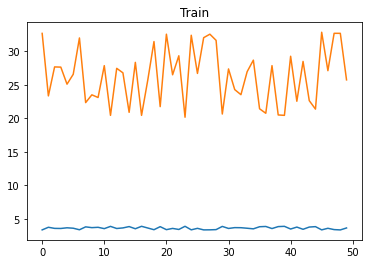

2/2 [==============================] - 2s 10ms/step


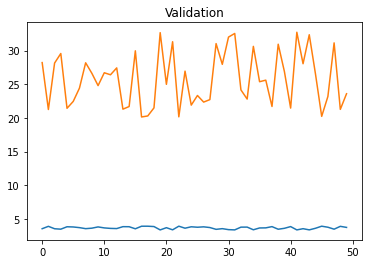

3/3 [==============================] - 0s 5ms/step


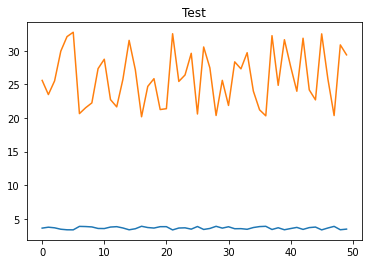

3/3 [==============================] - 1s 398ms/step


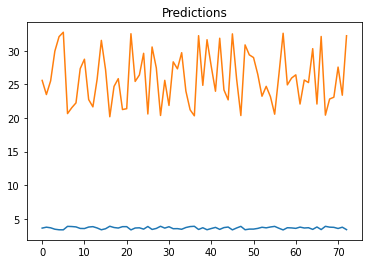

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

511.84199745710765

### LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 688.3903 - root_mean_squared_error: 26.2372  

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 39s 4s/step - loss: 687.1034 - root_mean_squared_error: 26.2127 - val_loss: 718.2037 - val_root_mean_squared_error: 26.7993
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 689.8212 - root_mean_squared_error: 26.2644

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 683.8763 - root_mean_squared_error: 26.1510 - val_loss: 714.6527 - val_root_mean_squared_error: 26.7330
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 682.5881 - root_mean_squared_error: 26.1264

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 680.2705 - root_mean_squared_error: 26.0820 - val_loss: 711.1996 - val_root_mean_squared_error: 26.6683
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 678.0165 - root_mean_squared_error: 26.0387

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 678.0165 - root_mean_squared_error: 26.0387 - val_loss: 707.7877 - val_root_mean_squared_error: 26.6043
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 670.6431 - root_mean_squared_error: 25.8968

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 670.6431 - root_mean_squared_error: 25.8968 - val_loss: 704.4770 - val_root_mean_squared_error: 26.5420
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 669.4038 - root_mean_squared_error: 25.8728

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 669.4038 - root_mean_squared_error: 25.8728 - val_loss: 701.2722 - val_root_mean_squared_error: 26.4815
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 667.1751 - root_mean_squared_error: 25.8297

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 667.1751 - root_mean_squared_error: 25.8297 - val_loss: 698.1020 - val_root_mean_squared_error: 26.4216
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 662.7071 - root_mean_squared_error: 25.7431

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 664.0557 - root_mean_squared_error: 25.7693 - val_loss: 695.0385 - val_root_mean_squared_error: 26.3636
Epoch 9/30
4/8 [==============>...............] - ETA: 0s - loss: 670.1778 - root_mean_squared_error: 25.8878

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 660.0735 - root_mean_squared_error: 25.6919 - val_loss: 691.9708 - val_root_mean_squared_error: 26.3053
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 662.5713 - root_mean_squared_error: 25.7405

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 655.7822 - root_mean_squared_error: 25.6082 - val_loss: 688.6411 - val_root_mean_squared_error: 26.2420
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 653.7346 - root_mean_squared_error: 25.5682

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 653.7346 - root_mean_squared_error: 25.5682 - val_loss: 684.7814 - val_root_mean_squared_error: 26.1683
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 650.8242 - root_mean_squared_error: 25.5113

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 650.8242 - root_mean_squared_error: 25.5113 - val_loss: 680.5897 - val_root_mean_squared_error: 26.0881
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 665.9457 - root_mean_squared_error: 25.8059

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 650.6220 - root_mean_squared_error: 25.5073 - val_loss: 676.5698 - val_root_mean_squared_error: 26.0110
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 650.6758 - root_mean_squared_error: 25.5083

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 647.8267 - root_mean_squared_error: 25.4524 - val_loss: 673.1278 - val_root_mean_squared_error: 25.9447
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 643.2669 - root_mean_squared_error: 25.3627

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 643.2669 - root_mean_squared_error: 25.3627 - val_loss: 670.1274 - val_root_mean_squared_error: 25.8868
Epoch 16/30
3/8 [==========>...................] - ETA: 0s - loss: 639.6811 - root_mean_squared_error: 25.2919

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 640.0007 - root_mean_squared_error: 25.2982 - val_loss: 667.2545 - val_root_mean_squared_error: 25.8313
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 637.9977 - root_mean_squared_error: 25.2586

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 637.9977 - root_mean_squared_error: 25.2586 - val_loss: 664.3101 - val_root_mean_squared_error: 25.7742
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 629.6494 - root_mean_squared_error: 25.0928

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 634.7649 - root_mean_squared_error: 25.1945 - val_loss: 661.2034 - val_root_mean_squared_error: 25.7139
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 628.6115 - root_mean_squared_error: 25.0721

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 632.1882 - root_mean_squared_error: 25.1434 - val_loss: 658.0008 - val_root_mean_squared_error: 25.6515
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 632.8222 - root_mean_squared_error: 25.1560

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 628.0121 - root_mean_squared_error: 25.0602 - val_loss: 654.7162 - val_root_mean_squared_error: 25.5874
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 621.3732 - root_mean_squared_error: 24.9274

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 622.6790 - root_mean_squared_error: 24.9535 - val_loss: 651.3259 - val_root_mean_squared_error: 25.5211
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 617.0430 - root_mean_squared_error: 24.8404

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 622.0049 - root_mean_squared_error: 24.9400 - val_loss: 647.9029 - val_root_mean_squared_error: 25.4539
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 612.1417 - root_mean_squared_error: 24.7415

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 616.6812 - root_mean_squared_error: 24.8331 - val_loss: 644.4460 - val_root_mean_squared_error: 25.3859
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 613.9951 - root_mean_squared_error: 24.7789

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 612.3132 - root_mean_squared_error: 24.7450 - val_loss: 640.9160 - val_root_mean_squared_error: 25.3163
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 664.6689 - root_mean_squared_error: 25.7812

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 612.3657 - root_mean_squared_error: 24.7460 - val_loss: 637.3033 - val_root_mean_squared_error: 25.2449
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 606.7513 - root_mean_squared_error: 24.6323

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 605.9092 - root_mean_squared_error: 24.6152 - val_loss: 633.6082 - val_root_mean_squared_error: 25.1716
Epoch 27/30
4/8 [==============>...............] - ETA: 0s - loss: 607.7428 - root_mean_squared_error: 24.6524

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 602.6592 - root_mean_squared_error: 24.5491 - val_loss: 629.8328 - val_root_mean_squared_error: 25.0965
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 597.6098 - root_mean_squared_error: 24.4461

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 597.2761 - root_mean_squared_error: 24.4392 - val_loss: 625.9551 - val_root_mean_squared_error: 25.0191
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 593.5682 - root_mean_squared_error: 24.3633

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 593.6718 - root_mean_squared_error: 24.3654 - val_loss: 621.9783 - val_root_mean_squared_error: 24.9395
Epoch 30/30
3/8 [==========>...................] - ETA: 0s - loss: 568.9769 - root_mean_squared_error: 23.8532

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 2s 9ms/step


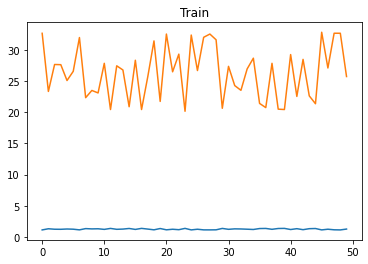

2/2 [==============================] - 2s 7ms/step


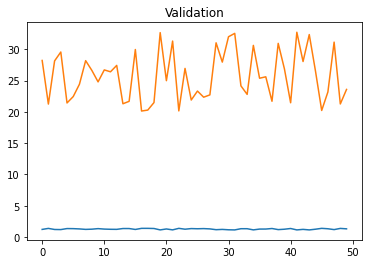

3/3 [==============================] - 0s 98ms/step


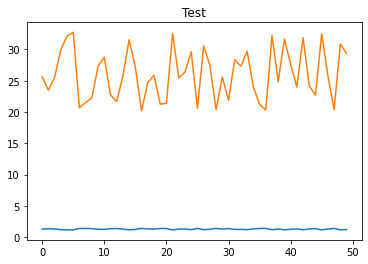

3/3 [==============================] - 0s 4ms/step


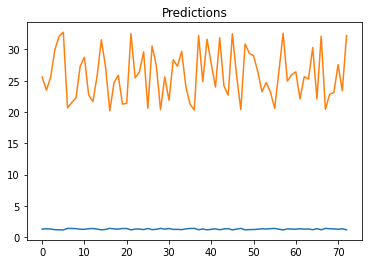

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

622.3701600912347

### RNN

Epoch 1/30
1/8 [==>...........................] - ETA: 44s - loss: 738.2225 - root_mean_squared_error: 27.1703INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 29s 3s/step - loss: 702.3358 - root_mean_squared_error: 26.5016 - val_loss: 731.6285 - val_root_mean_squared_error: 27.0486
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 694.6155 - root_mean_squared_error: 26.3556INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 694.6155 - root_mean_squared_error: 26.3556 - val_loss: 724.1906 - val_root_mean_squared_error: 26.9108
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 690.7540 - root_mean_squared_error: 26.2822INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 827ms/step - loss: 690.7540 - root_mean_squared_error: 26.2822 - val_loss: 716.8828 - val_root_mean_squared_error: 26.7747
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 690.6695 - root_mean_squared_error: 26.2806INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 891ms/step - loss: 684.9698 - root_mean_squared_error: 26.1719 - val_loss: 709.6584 - val_root_mean_squared_error: 26.6394
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 711.2258 - root_mean_squared_error: 26.6688INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 962ms/step - loss: 679.0106 - root_mean_squared_error: 26.0578 - val_loss: 702.5531 - val_root_mean_squared_error: 26.5057
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 663.6909 - root_mean_squared_error: 25.7622INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 663.6909 - root_mean_squared_error: 25.7622 - val_loss: 695.5547 - val_root_mean_squared_error: 26.3734
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 658.8414 - root_mean_squared_error: 25.6679INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 658.8414 - root_mean_squared_error: 25.6679 - val_loss: 688.6400 - val_root_mean_squared_error: 26.2420
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 642.2156 - root_mean_squared_error: 25.3420INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 919ms/step - loss: 655.4820 - root_mean_squared_error: 25.6024 - val_loss: 681.7971 - val_root_mean_squared_error: 26.1112
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 613.3583 - root_mean_squared_error: 24.7661INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 787ms/step - loss: 650.9525 - root_mean_squared_error: 25.5138 - val_loss: 674.8607 - val_root_mean_squared_error: 25.9781
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 650.3488 - root_mean_squared_error: 25.5019INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 640.6996 - root_mean_squared_error: 25.3120 - val_loss: 667.8934 - val_root_mean_squared_error: 25.8436
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 622.9385 - root_mean_squared_error: 24.9587INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 930ms/step - loss: 630.3871 - root_mean_squared_error: 25.1075 - val_loss: 660.9178 - val_root_mean_squared_error: 25.7083
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 634.5526 - root_mean_squared_error: 25.1903INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 628.0411 - root_mean_squared_error: 25.0607 - val_loss: 653.9313 - val_root_mean_squared_error: 25.5721
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 654.8917 - root_mean_squared_error: 25.5909INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 618.1285 - root_mean_squared_error: 24.8622 - val_loss: 646.9700 - val_root_mean_squared_error: 25.4356
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 615.7671 - root_mean_squared_error: 24.8147INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 615.7671 - root_mean_squared_error: 24.8147 - val_loss: 639.8301 - val_root_mean_squared_error: 25.2949
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 615.5392 - root_mean_squared_error: 24.8101INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 917ms/step - loss: 601.3450 - root_mean_squared_error: 24.5223 - val_loss: 632.5471 - val_root_mean_squared_error: 25.1505
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 599.7384 - root_mean_squared_error: 24.4896INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 862ms/step - loss: 599.7384 - root_mean_squared_error: 24.4896 - val_loss: 625.0903 - val_root_mean_squared_error: 25.0018
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 590.9016 - root_mean_squared_error: 24.3085INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 984ms/step - loss: 590.9016 - root_mean_squared_error: 24.3085 - val_loss: 617.4562 - val_root_mean_squared_error: 24.8487
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 528.2804 - root_mean_squared_error: 22.9844INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 583.3235 - root_mean_squared_error: 24.1521 - val_loss: 609.5102 - val_root_mean_squared_error: 24.6883
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 574.7605 - root_mean_squared_error: 23.9742INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 572.9271 - root_mean_squared_error: 23.9359 - val_loss: 601.2665 - val_root_mean_squared_error: 24.5207
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 563.9929 - root_mean_squared_error: 23.7485INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 566.6901 - root_mean_squared_error: 23.8053 - val_loss: 592.7938 - val_root_mean_squared_error: 24.3474
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 593.5863 - root_mean_squared_error: 24.3636INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 562.8134 - root_mean_squared_error: 23.7237 - val_loss: 584.0303 - val_root_mean_squared_error: 24.1667
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 592.8420 - root_mean_squared_error: 24.3483INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 550.5617 - root_mean_squared_error: 23.4641 - val_loss: 575.1602 - val_root_mean_squared_error: 23.9825
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 541.3640 - root_mean_squared_error: 23.2672INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 541.3640 - root_mean_squared_error: 23.2672 - val_loss: 566.2783 - val_root_mean_squared_error: 23.7966
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 572.8445 - root_mean_squared_error: 23.9342INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 530.2054 - root_mean_squared_error: 23.0262 - val_loss: 557.5317 - val_root_mean_squared_error: 23.6121
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 555.3464 - root_mean_squared_error: 23.5658INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 522.6342 - root_mean_squared_error: 22.8612 - val_loss: 548.8076 - val_root_mean_squared_error: 23.4266
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 479.3147 - root_mean_squared_error: 21.8933INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 893ms/step - loss: 514.8680 - root_mean_squared_error: 22.6907 - val_loss: 540.2496 - val_root_mean_squared_error: 23.2433
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 503.8371 - root_mean_squared_error: 22.4463INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 990ms/step - loss: 504.9885 - root_mean_squared_error: 22.4719 - val_loss: 531.9484 - val_root_mean_squared_error: 23.0640
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 498.6786 - root_mean_squared_error: 22.3311INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 726ms/step - loss: 498.7204 - root_mean_squared_error: 22.3320 - val_loss: 523.7240 - val_root_mean_squared_error: 22.8850
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 539.6250 - root_mean_squared_error: 23.2298INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 489.7527 - root_mean_squared_error: 22.1304 - val_loss: 515.6973 - val_root_mean_squared_error: 22.7090
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 494.8485 - root_mean_squared_error: 22.2452INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 3ms/step


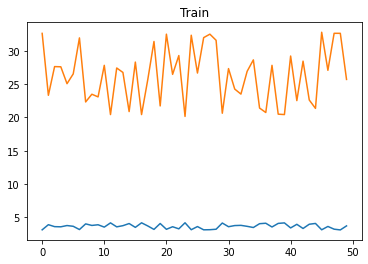

2/2 [==============================] - 0s 5ms/step


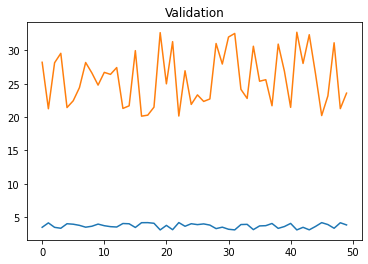

3/3 [==============================] - 0s 5ms/step


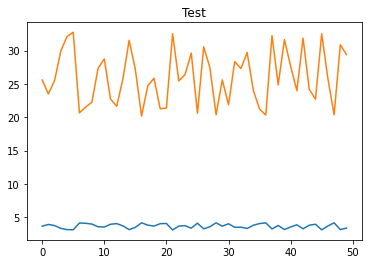

3/3 [==============================] - 0s 3ms/step


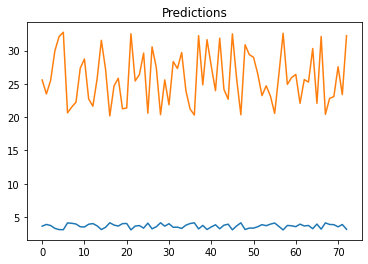

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

512.3075190694642

# Moving Average with Encoder

### CNN

Epoch 1/10
6/8 [=====================>........] - ETA: 0s - loss: 396.6440 - root_mean_squared_error: 19.9159 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 537ms/step - loss: 385.6061 - root_mean_squared_error: 19.6369 - val_loss: 405.8740 - val_root_mean_squared_error: 20.1463
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 372.5388 - root_mean_squared_error: 19.3013

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 11s 2s/step - loss: 356.8770 - root_mean_squared_error: 18.8912 - val_loss: 339.7231 - val_root_mean_squared_error: 18.4316
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 270.9396 - root_mean_squared_error: 16.4602

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 378ms/step - loss: 270.3156 - root_mean_squared_error: 16.4413 - val_loss: 278.0558 - val_root_mean_squared_error: 16.6750
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 245.0810 - root_mean_squared_error: 15.6551

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 268ms/step - loss: 245.8201 - root_mean_squared_error: 15.6787 - val_loss: 221.3799 - val_root_mean_squared_error: 14.8788
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 204.6823 - root_mean_squared_error: 14.3067

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 360ms/step - loss: 201.8593 - root_mean_squared_error: 14.2077 - val_loss: 171.4274 - val_root_mean_squared_error: 13.0930
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 159.2561 - root_mean_squared_error: 12.6197

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 602ms/step - loss: 160.1451 - root_mean_squared_error: 12.6548 - val_loss: 130.2802 - val_root_mean_squared_error: 11.4140
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 121.7958 - root_mean_squared_error: 11.0361

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 720ms/step - loss: 121.7958 - root_mean_squared_error: 11.0361 - val_loss: 97.3247 - val_root_mean_squared_error: 9.8653
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 107.6263 - root_mean_squared_error: 10.3743

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 316ms/step - loss: 100.4152 - root_mean_squared_error: 10.0207 - val_loss: 70.3282 - val_root_mean_squared_error: 8.3862
Epoch 9/10
5/8 [=================>............] - ETA: 0s - loss: 95.3089 - root_mean_squared_error: 9.7626  

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 500ms/step - loss: 90.4219 - root_mean_squared_error: 9.5090 - val_loss: 49.8427 - val_root_mean_squared_error: 7.0599
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 73.4545 - root_mean_squared_error: 8.5706

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 10ms/step


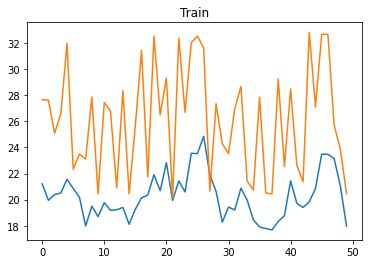

2/2 [==============================] - 0s 6ms/step


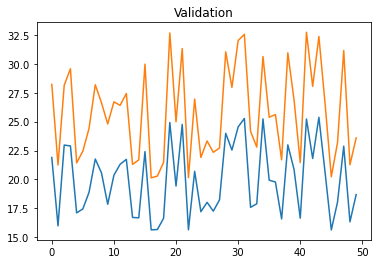

3/3 [==============================] - 0s 4ms/step


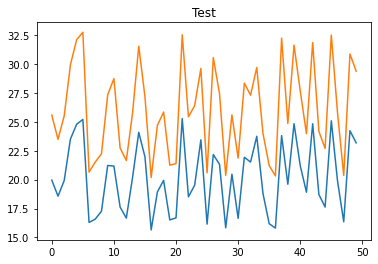

3/3 [==============================] - 0s 4ms/step


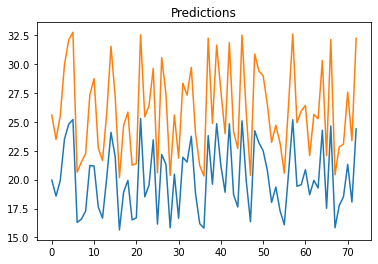

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

34.74183623813102

### RNN

Epoch 1/10
1/8 [==>...........................] - ETA: 28s - loss: 506.0275 - root_mean_squared_error: 22.4951INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 1s/step - loss: 573.5230 - root_mean_squared_error: 23.9483 - val_loss: 606.4441 - val_root_mean_squared_error: 24.6261
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 571.1242 - root_mean_squared_error: 23.8982INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 914ms/step - loss: 574.8271 - root_mean_squared_error: 23.9756 - val_loss: 599.3336 - val_root_mean_squared_error: 24.4813
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 568.5649 - root_mean_squared_error: 23.8446INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 801ms/step - loss: 565.8405 - root_mean_squared_error: 23.7874 - val_loss: 592.2531 - val_root_mean_squared_error: 24.3363
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 560.8963 - root_mean_squared_error: 23.6832INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 562.0206 - root_mean_squared_error: 23.7070 - val_loss: 584.9874 - val_root_mean_squared_error: 24.1865
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 549.3025 - root_mean_squared_error: 23.4372INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 951ms/step - loss: 549.6502 - root_mean_squared_error: 23.4446 - val_loss: 577.6412 - val_root_mean_squared_error: 24.0342
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 537.4999 - root_mean_squared_error: 23.1840INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 542.8717 - root_mean_squared_error: 23.2996 - val_loss: 570.3151 - val_root_mean_squared_error: 23.8813
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 535.8903 - root_mean_squared_error: 23.1493INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 992ms/step - loss: 534.8515 - root_mean_squared_error: 23.1269 - val_loss: 563.0461 - val_root_mean_squared_error: 23.7286
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 532.8118 - root_mean_squared_error: 23.0827INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 527.7008 - root_mean_squared_error: 22.9717 - val_loss: 555.9509 - val_root_mean_squared_error: 23.5786
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 523.7438 - root_mean_squared_error: 22.8854INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 896ms/step - loss: 523.7438 - root_mean_squared_error: 22.8854 - val_loss: 548.9569 - val_root_mean_squared_error: 23.4298
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 548.2313 - root_mean_squared_error: 23.4143INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 5ms/step


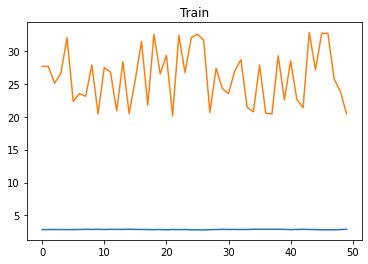

2/2 [==============================] - 2s 13ms/step


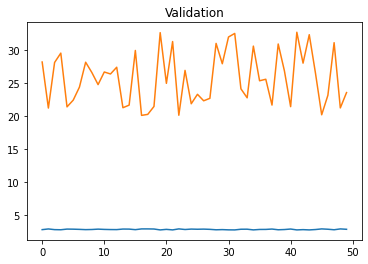

3/3 [==============================] - 0s 115ms/step


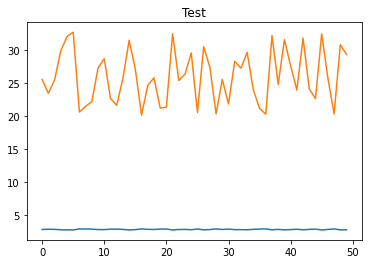

3/3 [==============================] - 1s 391ms/step


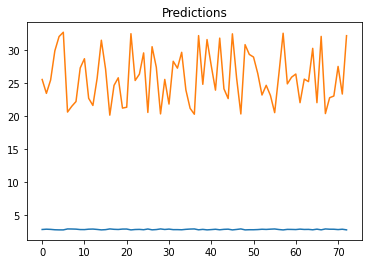

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

546.1033869938894

### GRU

Epoch 1/10
6/8 [=====================>........] - ETA: 0s - loss: 575.6378 - root_mean_squared_error: 23.9925  

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 3s/step - loss: 568.5367 - root_mean_squared_error: 23.8440 - val_loss: 596.8814 - val_root_mean_squared_error: 24.4312
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 562.9749 - root_mean_squared_error: 23.7271

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 562.9749 - root_mean_squared_error: 23.7271 - val_loss: 592.4697 - val_root_mean_squared_error: 24.3407
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 560.7452 - root_mean_squared_error: 23.6801

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 560.7930 - root_mean_squared_error: 23.6811 - val_loss: 588.0712 - val_root_mean_squared_error: 24.2502
Epoch 4/10
5/8 [=================>............] - ETA: 0s - loss: 561.3448 - root_mean_squared_error: 23.6927

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 557.8438 - root_mean_squared_error: 23.6187 - val_loss: 583.6666 - val_root_mean_squared_error: 24.1592
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 549.7313 - root_mean_squared_error: 23.4464

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 550.0918 - root_mean_squared_error: 23.4540 - val_loss: 579.2508 - val_root_mean_squared_error: 24.0676
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 545.2761 - root_mean_squared_error: 23.3511

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 546.1857 - root_mean_squared_error: 23.3706 - val_loss: 574.8399 - val_root_mean_squared_error: 23.9758
Epoch 7/10
4/8 [==============>...............] - ETA: 0s - loss: 552.4561 - root_mean_squared_error: 23.5044

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 543.5779 - root_mean_squared_error: 23.3148 - val_loss: 570.4305 - val_root_mean_squared_error: 23.8837
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 535.2706 - root_mean_squared_error: 23.1359

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 537.2690 - root_mean_squared_error: 23.1791 - val_loss: 566.0333 - val_root_mean_squared_error: 23.7915
Epoch 9/10
4/8 [==============>...............] - ETA: 0s - loss: 534.1223 - root_mean_squared_error: 23.1111

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 534.6407 - root_mean_squared_error: 23.1223 - val_loss: 561.6070 - val_root_mean_squared_error: 23.6982
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 524.4598 - root_mean_squared_error: 22.9011

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 7ms/step


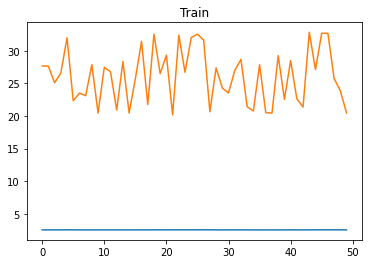

2/2 [==============================] - 1s 11ms/step


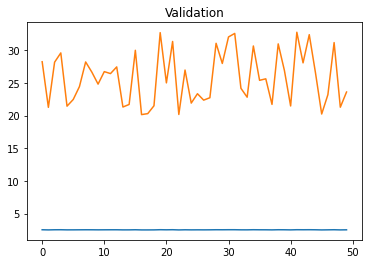

3/3 [==============================] - 0s 12ms/step


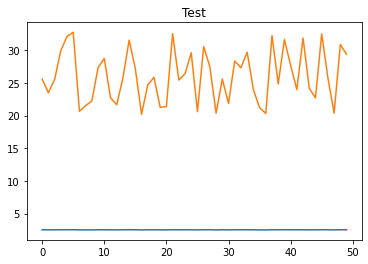

3/3 [==============================] - 0s 5ms/step


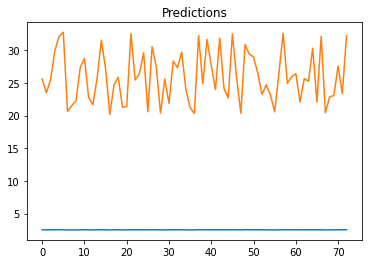

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

561.3419023480017

### LSTM

Epoch 1/10
6/8 [=====================>........] - ETA: 0s - loss: 616.2318 - root_mean_squared_error: 24.8240  

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 5s/step - loss: 614.1744 - root_mean_squared_error: 24.7825 - val_loss: 644.7162 - val_root_mean_squared_error: 25.3913
Epoch 2/10
5/8 [=================>............] - ETA: 0s - loss: 617.7950 - root_mean_squared_error: 24.8555

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 610.8143 - root_mean_squared_error: 24.7147 - val_loss: 641.4729 - val_root_mean_squared_error: 25.3273
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 610.4561 - root_mean_squared_error: 24.7074

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 609.3541 - root_mean_squared_error: 24.6851 - val_loss: 638.2510 - val_root_mean_squared_error: 25.2636
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 605.7158 - root_mean_squared_error: 24.6113

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 603.7101 - root_mean_squared_error: 24.5705 - val_loss: 635.0543 - val_root_mean_squared_error: 25.2003
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 602.7522 - root_mean_squared_error: 24.5510

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 602.7522 - root_mean_squared_error: 24.5510 - val_loss: 631.8576 - val_root_mean_squared_error: 25.1368
Epoch 6/10
5/8 [=================>............] - ETA: 0s - loss: 610.6715 - root_mean_squared_error: 24.7118

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 599.2045 - root_mean_squared_error: 24.4787 - val_loss: 628.6681 - val_root_mean_squared_error: 25.0733
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 591.0507 - root_mean_squared_error: 24.3115

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 595.5733 - root_mean_squared_error: 24.4044 - val_loss: 625.5151 - val_root_mean_squared_error: 25.0103
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 594.9435 - root_mean_squared_error: 24.3915

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 593.2176 - root_mean_squared_error: 24.3561 - val_loss: 622.3528 - val_root_mean_squared_error: 24.9470
Epoch 9/10
6/8 [=====================>........] - ETA: 0s - loss: 585.3019 - root_mean_squared_error: 24.1930

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 588.2787 - root_mean_squared_error: 24.2545 - val_loss: 619.1885 - val_root_mean_squared_error: 24.8835
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 586.8456 - root_mean_squared_error: 24.2249

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 10ms/step


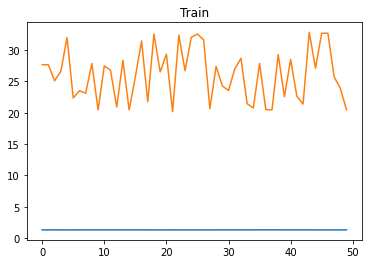

2/2 [==============================] - 2s 19ms/step


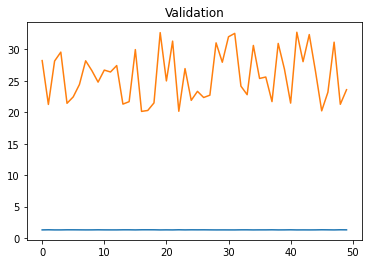

3/3 [==============================] - 0s 7ms/step


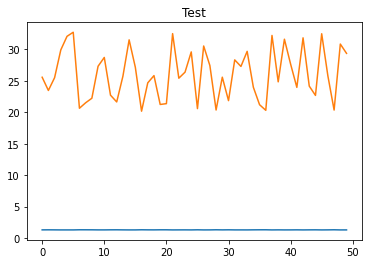

3/3 [==============================] - 0s 5ms/step


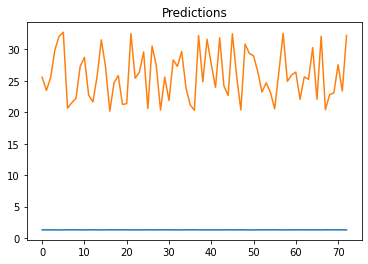

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

620.4143032803661

# Hybrid

## General

### CNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 634.7089 - root_mean_squared_error: 25.1934

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 8s/step - loss: 634.7089 - root_mean_squared_error: 25.1934 - val_loss: 655.2069 - val_root_mean_squared_error: 25.5970
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 614.4605 - root_mean_squared_error: 24.7883

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 64s 9s/step - loss: 617.1452 - root_mean_squared_error: 24.8424 - val_loss: 637.5659 - val_root_mean_squared_error: 25.2501
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 600.9865 - root_mean_squared_error: 24.5150

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 66s 9s/step - loss: 600.4282 - root_mean_squared_error: 24.5036 - val_loss: 621.7544 - val_root_mean_squared_error: 24.9350
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 585.9658 - root_mean_squared_error: 24.2067

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 53s 7s/step - loss: 585.9658 - root_mean_squared_error: 24.2067 - val_loss: 608.6418 - val_root_mean_squared_error: 24.6707
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 573.8561 - root_mean_squared_error: 23.9553

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 89s 13s/step - loss: 573.8561 - root_mean_squared_error: 23.9553 - val_loss: 596.9902 - val_root_mean_squared_error: 24.4334
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 562.7077 - root_mean_squared_error: 23.7215

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 562.7077 - root_mean_squared_error: 23.7215 - val_loss: 585.8920 - val_root_mean_squared_error: 24.2052
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 551.9424 - root_mean_squared_error: 23.4935

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 79s 11s/step - loss: 551.9424 - root_mean_squared_error: 23.4935 - val_loss: 574.9499 - val_root_mean_squared_error: 23.9781
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 537.5397 - root_mean_squared_error: 23.1849

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 541.3054 - root_mean_squared_error: 23.2660 - val_loss: 563.9467 - val_root_mean_squared_error: 23.7476
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 530.4964 - root_mean_squared_error: 23.0325

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 530.4964 - root_mean_squared_error: 23.0325 - val_loss: 552.7518 - val_root_mean_squared_error: 23.5107
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 519.4854 - root_mean_squared_error: 22.7922

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 78s 11s/step - loss: 519.4854 - root_mean_squared_error: 22.7922 - val_loss: 541.2756 - val_root_mean_squared_error: 23.2653
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 507.5851 - root_mean_squared_error: 22.5296

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 508.2149 - root_mean_squared_error: 22.5436 - val_loss: 529.5704 - val_root_mean_squared_error: 23.0124
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 496.8129 - root_mean_squared_error: 22.2893

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 496.8129 - root_mean_squared_error: 22.2893 - val_loss: 517.9185 - val_root_mean_squared_error: 22.7578
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 485.6447 - root_mean_squared_error: 22.0373

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 485.6447 - root_mean_squared_error: 22.0373 - val_loss: 506.6901 - val_root_mean_squared_error: 22.5098
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 474.9108 - root_mean_squared_error: 21.7924

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 98s 14s/step - loss: 474.9108 - root_mean_squared_error: 21.7924 - val_loss: 496.0320 - val_root_mean_squared_error: 22.2718
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 464.0347 - root_mean_squared_error: 21.5415

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 76s 11s/step - loss: 464.7185 - root_mean_squared_error: 21.5573 - val_loss: 485.8582 - val_root_mean_squared_error: 22.0422
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 455.0317 - root_mean_squared_error: 21.3315

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 64s 9s/step - loss: 455.0317 - root_mean_squared_error: 21.3315 - val_loss: 476.0793 - val_root_mean_squared_error: 21.8192
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 445.6437 - root_mean_squared_error: 21.1103

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 12s/step - loss: 445.6437 - root_mean_squared_error: 21.1103 - val_loss: 466.6282 - val_root_mean_squared_error: 21.6016
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 436.5915 - root_mean_squared_error: 20.8948

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 436.5915 - root_mean_squared_error: 20.8948 - val_loss: 457.4236 - val_root_mean_squared_error: 21.3875
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 427.8103 - root_mean_squared_error: 20.6836

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 68s 10s/step - loss: 427.8103 - root_mean_squared_error: 20.6836 - val_loss: 448.5473 - val_root_mean_squared_error: 21.1789
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 419.4553 - root_mean_squared_error: 20.4806

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 11s/step - loss: 419.3201 - root_mean_squared_error: 20.4773 - val_loss: 439.9970 - val_root_mean_squared_error: 20.9761
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 414.0041 - root_mean_squared_error: 20.3471

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 80s 11s/step - loss: 411.1754 - root_mean_squared_error: 20.2775 - val_loss: 431.7992 - val_root_mean_squared_error: 20.7798
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 404.2932 - root_mean_squared_error: 20.1070

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 69s 10s/step - loss: 403.3970 - root_mean_squared_error: 20.0847 - val_loss: 424.0185 - val_root_mean_squared_error: 20.5917
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 396.0159 - root_mean_squared_error: 19.9001

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 107s 15s/step - loss: 396.0159 - root_mean_squared_error: 19.9001 - val_loss: 416.6655 - val_root_mean_squared_error: 20.4124
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 389.0972 - root_mean_squared_error: 19.7255

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 69s 10s/step - loss: 389.0972 - root_mean_squared_error: 19.7255 - val_loss: 409.7988 - val_root_mean_squared_error: 20.2435
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 382.6681 - root_mean_squared_error: 19.5619

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 68s 10s/step - loss: 382.6681 - root_mean_squared_error: 19.5619 - val_loss: 403.4324 - val_root_mean_squared_error: 20.0856
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 374.4972 - root_mean_squared_error: 19.3519

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 14s/step - loss: 376.6816 - root_mean_squared_error: 19.4083 - val_loss: 397.5428 - val_root_mean_squared_error: 19.9385
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 371.1477 - root_mean_squared_error: 19.2652

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 371.1477 - root_mean_squared_error: 19.2652 - val_loss: 392.0277 - val_root_mean_squared_error: 19.7997
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 366.8970 - root_mean_squared_error: 19.1546

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 68s 10s/step - loss: 365.9233 - root_mean_squared_error: 19.1291 - val_loss: 386.7929 - val_root_mean_squared_error: 19.6671
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 360.8986 - root_mean_squared_error: 18.9973

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 98s 14s/step - loss: 360.8986 - root_mean_squared_error: 18.9973 - val_loss: 381.6396 - val_root_mean_squared_error: 19.5356
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 356.6763 - root_mean_squared_error: 18.8859

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 58ms/step


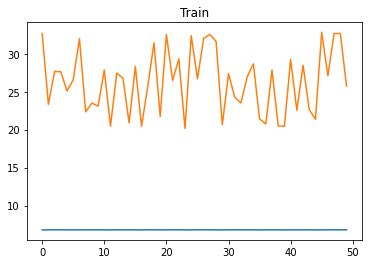

2/2 [==============================] - 6s 29ms/step


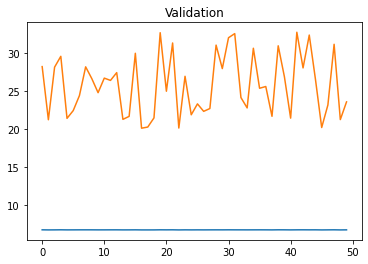

3/3 [==============================] - 0s 11ms/step


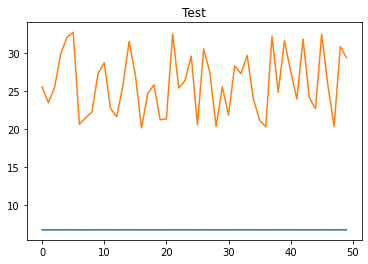

3/3 [==============================] - 0s 32ms/step


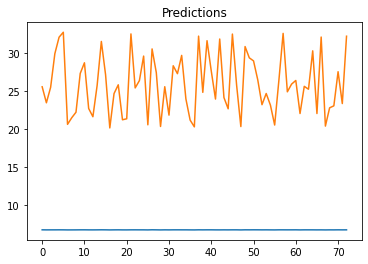

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

379.9063442135823

### RNN LSTM

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 667.3521 - root_mean_squared_error: 25.8332

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 87s 10s/step - loss: 676.1091 - root_mean_squared_error: 26.0021 - val_loss: 704.1210 - val_root_mean_squared_error: 26.5353
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 668.7544 - root_mean_squared_error: 25.8603

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 62s 8s/step - loss: 668.7544 - root_mean_squared_error: 25.8603 - val_loss: 696.6172 - val_root_mean_squared_error: 26.3935
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 661.4362 - root_mean_squared_error: 25.7184

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 661.4362 - root_mean_squared_error: 25.7184 - val_loss: 689.1486 - val_root_mean_squared_error: 26.2516
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 654.1419 - root_mean_squared_error: 25.5762

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 654.1419 - root_mean_squared_error: 25.5762 - val_loss: 681.5651 - val_root_mean_squared_error: 26.1068
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 652.7035 - root_mean_squared_error: 25.5481

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 646.6671 - root_mean_squared_error: 25.4296 - val_loss: 673.7311 - val_root_mean_squared_error: 25.9563
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 638.8499 - root_mean_squared_error: 25.2755

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 5s/step - loss: 638.8499 - root_mean_squared_error: 25.2755 - val_loss: 665.5750 - val_root_mean_squared_error: 25.7987
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 630.7613 - root_mean_squared_error: 25.1150

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 69s 10s/step - loss: 630.7613 - root_mean_squared_error: 25.1150 - val_loss: 656.9941 - val_root_mean_squared_error: 25.6319
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 622.2435 - root_mean_squared_error: 24.9448

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 622.2435 - root_mean_squared_error: 24.9448 - val_loss: 648.0336 - val_root_mean_squared_error: 25.4565
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 611.0352 - root_mean_squared_error: 24.7191

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 613.3547 - root_mean_squared_error: 24.7660 - val_loss: 638.7519 - val_root_mean_squared_error: 25.2735
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 605.4100 - root_mean_squared_error: 24.6051

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 604.1755 - root_mean_squared_error: 24.5800 - val_loss: 629.2490 - val_root_mean_squared_error: 25.0848
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 596.7430 - root_mean_squared_error: 24.4283

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 594.8760 - root_mean_squared_error: 24.3901 - val_loss: 619.6733 - val_root_mean_squared_error: 24.8932
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 585.5455 - root_mean_squared_error: 24.1980

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 53s 8s/step - loss: 585.5455 - root_mean_squared_error: 24.1980 - val_loss: 610.1526 - val_root_mean_squared_error: 24.7013
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 576.3014 - root_mean_squared_error: 24.0063

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 576.3014 - root_mean_squared_error: 24.0063 - val_loss: 600.7966 - val_root_mean_squared_error: 24.5112
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 568.6485 - root_mean_squared_error: 23.8464

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 567.2714 - root_mean_squared_error: 23.8175 - val_loss: 591.6086 - val_root_mean_squared_error: 24.3230
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 559.9586 - root_mean_squared_error: 23.6634

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 558.3779 - root_mean_squared_error: 23.6300 - val_loss: 582.6295 - val_root_mean_squared_error: 24.1377
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 547.7653 - root_mean_squared_error: 23.4044

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 549.6521 - root_mean_squared_error: 23.4447 - val_loss: 573.8719 - val_root_mean_squared_error: 23.9556
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 541.2405 - root_mean_squared_error: 23.2646

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 541.2405 - root_mean_squared_error: 23.2646 - val_loss: 565.3350 - val_root_mean_squared_error: 23.7768
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 533.0549 - root_mean_squared_error: 23.0880

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 533.0549 - root_mean_squared_error: 23.0880 - val_loss: 557.1249 - val_root_mean_squared_error: 23.6035
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 520.3994 - root_mean_squared_error: 22.8123

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 525.1451 - root_mean_squared_error: 22.9160 - val_loss: 549.2399 - val_root_mean_squared_error: 23.4359
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 522.0251 - root_mean_squared_error: 22.8479

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 517.6313 - root_mean_squared_error: 22.7515 - val_loss: 541.6476 - val_root_mean_squared_error: 23.2733
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 510.4030 - root_mean_squared_error: 22.5921

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 510.4030 - root_mean_squared_error: 22.5921 - val_loss: 534.4340 - val_root_mean_squared_error: 23.1178
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 505.2545 - root_mean_squared_error: 22.4779

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 503.5197 - root_mean_squared_error: 22.4392 - val_loss: 527.6065 - val_root_mean_squared_error: 22.9697
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 498.8150 - root_mean_squared_error: 22.3342

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 497.0284 - root_mean_squared_error: 22.2941 - val_loss: 521.0940 - val_root_mean_squared_error: 22.8275
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 490.8193 - root_mean_squared_error: 22.1544

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 490.8193 - root_mean_squared_error: 22.1544 - val_loss: 514.8774 - val_root_mean_squared_error: 22.6909
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 484.8279 - root_mean_squared_error: 22.0188

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 484.8279 - root_mean_squared_error: 22.0188 - val_loss: 508.8887 - val_root_mean_squared_error: 22.5586
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 485.7528 - root_mean_squared_error: 22.0398

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 62s 9s/step - loss: 479.1184 - root_mean_squared_error: 21.8888 - val_loss: 503.0704 - val_root_mean_squared_error: 22.4292
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 472.4365 - root_mean_squared_error: 21.7356

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 473.5253 - root_mean_squared_error: 21.7606 - val_loss: 497.4301 - val_root_mean_squared_error: 22.3031
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 468.0794 - root_mean_squared_error: 21.6351

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 468.0794 - root_mean_squared_error: 21.6351 - val_loss: 491.8928 - val_root_mean_squared_error: 22.1787
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 465.7482 - root_mean_squared_error: 21.5812

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 462.7625 - root_mean_squared_error: 21.5119 - val_loss: 486.4418 - val_root_mean_squared_error: 22.0554
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 457.4853 - root_mean_squared_error: 21.3889

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 5s 15ms/step


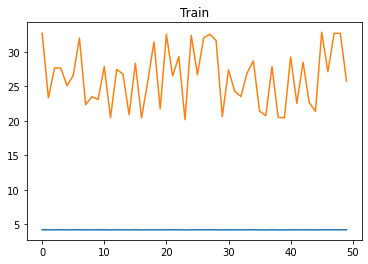

2/2 [==============================] - 6s 16ms/step


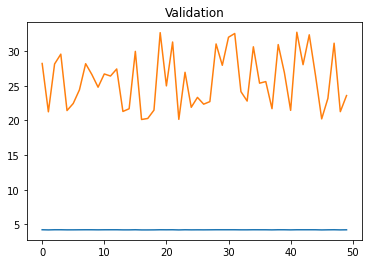

3/3 [==============================] - 0s 62ms/step


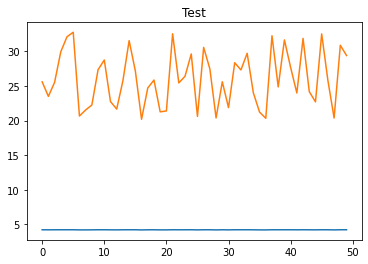

3/3 [==============================] - 0s 6ms/step


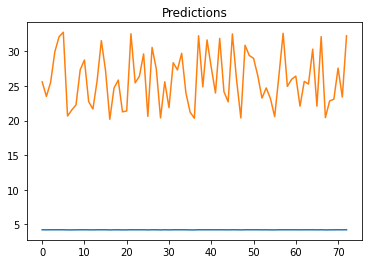

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

485.0082657646729

### RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 665.1759 - root_mean_squared_error: 25.7910

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 69s 6s/step - loss: 665.9019 - root_mean_squared_error: 25.8051 - val_loss: 688.8898 - val_root_mean_squared_error: 26.2467
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 645.4694 - root_mean_squared_error: 25.4061

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 650.0493 - root_mean_squared_error: 25.4961 - val_loss: 672.8517 - val_root_mean_squared_error: 25.9394
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 634.5027 - root_mean_squared_error: 25.1893

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 634.5027 - root_mean_squared_error: 25.1893 - val_loss: 657.1634 - val_root_mean_squared_error: 25.6352
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 619.3406 - root_mean_squared_error: 24.8866

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 619.3406 - root_mean_squared_error: 24.8866 - val_loss: 641.7229 - val_root_mean_squared_error: 25.3323
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 607.5236 - root_mean_squared_error: 24.6480

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 604.4662 - root_mean_squared_error: 24.5859 - val_loss: 626.5591 - val_root_mean_squared_error: 25.0312
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 591.6722 - root_mean_squared_error: 24.3243

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 589.8054 - root_mean_squared_error: 24.2859 - val_loss: 611.7567 - val_root_mean_squared_error: 24.7337
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 571.3625 - root_mean_squared_error: 23.9032

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 575.4573 - root_mean_squared_error: 23.9887 - val_loss: 597.2175 - val_root_mean_squared_error: 24.4380
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 564.3145 - root_mean_squared_error: 23.7553

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 561.3493 - root_mean_squared_error: 23.6928 - val_loss: 582.8982 - val_root_mean_squared_error: 24.1433
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 547.5300 - root_mean_squared_error: 23.3994

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 547.5300 - root_mean_squared_error: 23.3994 - val_loss: 568.9018 - val_root_mean_squared_error: 23.8517
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 529.4335 - root_mean_squared_error: 23.0094

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 534.0549 - root_mean_squared_error: 23.1096 - val_loss: 555.3136 - val_root_mean_squared_error: 23.5651
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 521.0125 - root_mean_squared_error: 22.8257

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 46s 6s/step - loss: 521.0125 - root_mean_squared_error: 22.8257 - val_loss: 542.1926 - val_root_mean_squared_error: 23.2850
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 508.7599 - root_mean_squared_error: 22.5557

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 508.4643 - root_mean_squared_error: 22.5492 - val_loss: 529.6907 - val_root_mean_squared_error: 23.0150
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 498.3539 - root_mean_squared_error: 22.3238

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 496.5797 - root_mean_squared_error: 22.2841 - val_loss: 517.8625 - val_root_mean_squared_error: 22.7566
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 480.2088 - root_mean_squared_error: 21.9137

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 485.3341 - root_mean_squared_error: 22.0303 - val_loss: 506.7493 - val_root_mean_squared_error: 22.5111
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 471.4245 - root_mean_squared_error: 21.7123

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 46s 6s/step - loss: 474.7976 - root_mean_squared_error: 21.7899 - val_loss: 496.2104 - val_root_mean_squared_error: 22.2758
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 471.5928 - root_mean_squared_error: 21.7162

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 464.8421 - root_mean_squared_error: 21.5602 - val_loss: 486.2317 - val_root_mean_squared_error: 22.0507
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 455.4108 - root_mean_squared_error: 21.3404

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 455.4108 - root_mean_squared_error: 21.3404 - val_loss: 476.8511 - val_root_mean_squared_error: 21.8369
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 447.6072 - root_mean_squared_error: 21.1567

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 446.5450 - root_mean_squared_error: 21.1316 - val_loss: 468.0072 - val_root_mean_squared_error: 21.6335
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 438.1694 - root_mean_squared_error: 20.9325

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 438.1694 - root_mean_squared_error: 20.9325 - val_loss: 459.6858 - val_root_mean_squared_error: 21.4403
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 433.5146 - root_mean_squared_error: 20.8210

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 430.3134 - root_mean_squared_error: 20.7440 - val_loss: 451.8093 - val_root_mean_squared_error: 21.2558
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 422.8537 - root_mean_squared_error: 20.5634

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 422.8537 - root_mean_squared_error: 20.5634 - val_loss: 444.4192 - val_root_mean_squared_error: 21.0813
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 415.8218 - root_mean_squared_error: 20.3917

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 415.8218 - root_mean_squared_error: 20.3917 - val_loss: 437.4388 - val_root_mean_squared_error: 20.9150
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 409.1934 - root_mean_squared_error: 20.2285

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 409.2304 - root_mean_squared_error: 20.2294 - val_loss: 430.7992 - val_root_mean_squared_error: 20.7557
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 402.0222 - root_mean_squared_error: 20.0505

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 402.9305 - root_mean_squared_error: 20.0731 - val_loss: 424.5566 - val_root_mean_squared_error: 20.6048
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 396.8445 - root_mean_squared_error: 19.9210

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 396.9833 - root_mean_squared_error: 19.9244 - val_loss: 418.6997 - val_root_mean_squared_error: 20.4622
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 391.4856 - root_mean_squared_error: 19.7860

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 391.4856 - root_mean_squared_error: 19.7860 - val_loss: 413.1745 - val_root_mean_squared_error: 20.3267
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 387.8704 - root_mean_squared_error: 19.6944

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 386.2747 - root_mean_squared_error: 19.6539 - val_loss: 408.0229 - val_root_mean_squared_error: 20.1996
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 381.1318 - root_mean_squared_error: 19.5226

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 381.4225 - root_mean_squared_error: 19.5300 - val_loss: 403.1917 - val_root_mean_squared_error: 20.0796
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 376.8415 - root_mean_squared_error: 19.4124

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 376.8415 - root_mean_squared_error: 19.4124 - val_loss: 398.6801 - val_root_mean_squared_error: 19.9670
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 372.6016 - root_mean_squared_error: 19.3029

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 7s 10ms/step


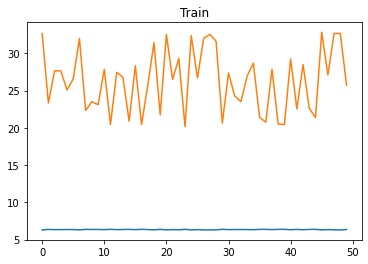

2/2 [==============================] - 7s 10ms/step


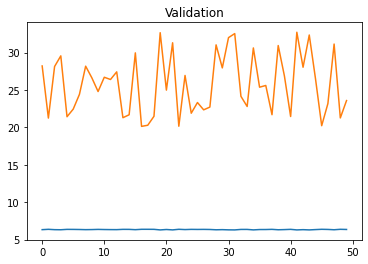

3/3 [==============================] - 0s 47ms/step


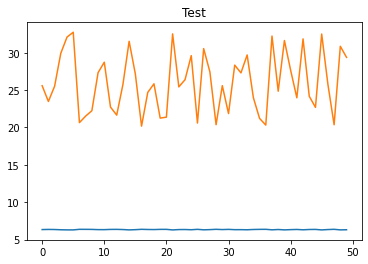

3/3 [==============================] - 0s 6ms/step


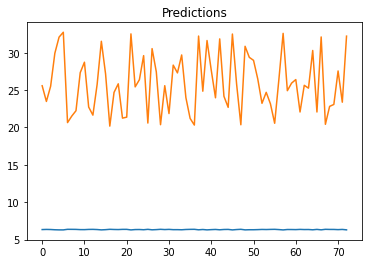

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

398.0236461119061

### CNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 609.5399 - root_mean_squared_error: 24.6889

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 114s 12s/step - loss: 606.2592 - root_mean_squared_error: 24.6223 - val_loss: 622.1641 - val_root_mean_squared_error: 24.9432
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 582.7604 - root_mean_squared_error: 24.1404

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 60s 8s/step - loss: 582.7604 - root_mean_squared_error: 24.1404 - val_loss: 598.8683 - val_root_mean_squared_error: 24.4718
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 558.3903 - root_mean_squared_error: 23.6303

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 560.6160 - root_mean_squared_error: 23.6773 - val_loss: 577.1277 - val_root_mean_squared_error: 24.0235
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 540.0879 - root_mean_squared_error: 23.2398

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 540.0879 - root_mean_squared_error: 23.2398 - val_loss: 557.1867 - val_root_mean_squared_error: 23.6048
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 521.5708 - root_mean_squared_error: 22.8379

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 81s 11s/step - loss: 521.5708 - root_mean_squared_error: 22.8379 - val_loss: 539.1964 - val_root_mean_squared_error: 23.2206
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 504.9315 - root_mean_squared_error: 22.4707

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 504.9315 - root_mean_squared_error: 22.4707 - val_loss: 523.1802 - val_root_mean_squared_error: 22.8731
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 490.0240 - root_mean_squared_error: 22.1365

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 490.0240 - root_mean_squared_error: 22.1365 - val_loss: 509.0124 - val_root_mean_squared_error: 22.5613
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 476.8349 - root_mean_squared_error: 21.8365

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 74s 10s/step - loss: 476.8349 - root_mean_squared_error: 21.8365 - val_loss: 496.2583 - val_root_mean_squared_error: 22.2769
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 465.0112 - root_mean_squared_error: 21.5641

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 465.0112 - root_mean_squared_error: 21.5641 - val_loss: 484.7434 - val_root_mean_squared_error: 22.0169
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 454.2065 - root_mean_squared_error: 21.3121

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 454.2065 - root_mean_squared_error: 21.3121 - val_loss: 474.1721 - val_root_mean_squared_error: 21.7755
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 444.2070 - root_mean_squared_error: 21.0762

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 60s 9s/step - loss: 444.2070 - root_mean_squared_error: 21.0762 - val_loss: 464.3940 - val_root_mean_squared_error: 21.5498
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 434.9201 - root_mean_squared_error: 20.8547

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 434.9201 - root_mean_squared_error: 20.8547 - val_loss: 455.3504 - val_root_mean_squared_error: 21.3389
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 426.3758 - root_mean_squared_error: 20.6489

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 83s 12s/step - loss: 426.3758 - root_mean_squared_error: 20.6489 - val_loss: 446.9975 - val_root_mean_squared_error: 21.1423
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 418.5928 - root_mean_squared_error: 20.4595

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 67s 9s/step - loss: 418.5928 - root_mean_squared_error: 20.4595 - val_loss: 439.4224 - val_root_mean_squared_error: 20.9624
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 411.5209 - root_mean_squared_error: 20.2860

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 411.5209 - root_mean_squared_error: 20.2860 - val_loss: 432.5973 - val_root_mean_squared_error: 20.7990
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 405.1082 - root_mean_squared_error: 20.1273

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 405.1082 - root_mean_squared_error: 20.1273 - val_loss: 426.3962 - val_root_mean_squared_error: 20.6494
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 399.2934 - root_mean_squared_error: 19.9823

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 399.2934 - root_mean_squared_error: 19.9823 - val_loss: 420.7187 - val_root_mean_squared_error: 20.5114
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 393.9773 - root_mean_squared_error: 19.8489

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 393.9773 - root_mean_squared_error: 19.8489 - val_loss: 415.4638 - val_root_mean_squared_error: 20.3829
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 388.9897 - root_mean_squared_error: 19.7228

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 388.9897 - root_mean_squared_error: 19.7228 - val_loss: 410.6392 - val_root_mean_squared_error: 20.2642
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 384.4360 - root_mean_squared_error: 19.6070

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 384.4360 - root_mean_squared_error: 19.6070 - val_loss: 406.1162 - val_root_mean_squared_error: 20.1523
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 380.1466 - root_mean_squared_error: 19.4973

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 380.1466 - root_mean_squared_error: 19.4973 - val_loss: 401.8864 - val_root_mean_squared_error: 20.0471
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 378.0348 - root_mean_squared_error: 19.4431

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 376.1254 - root_mean_squared_error: 19.3940 - val_loss: 397.8911 - val_root_mean_squared_error: 19.9472
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 372.3308 - root_mean_squared_error: 19.2959

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 372.3308 - root_mean_squared_error: 19.2959 - val_loss: 394.1361 - val_root_mean_squared_error: 19.8529
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 368.7740 - root_mean_squared_error: 19.2035

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 368.7740 - root_mean_squared_error: 19.2035 - val_loss: 390.6224 - val_root_mean_squared_error: 19.7642
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 365.4545 - root_mean_squared_error: 19.1169

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 365.4545 - root_mean_squared_error: 19.1169 - val_loss: 387.2943 - val_root_mean_squared_error: 19.6798
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 362.2977 - root_mean_squared_error: 19.0341

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 362.2977 - root_mean_squared_error: 19.0341 - val_loss: 384.1934 - val_root_mean_squared_error: 19.6009
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 359.3687 - root_mean_squared_error: 18.9570

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 359.3687 - root_mean_squared_error: 18.9570 - val_loss: 381.2678 - val_root_mean_squared_error: 19.5261
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 356.5879 - root_mean_squared_error: 18.8835

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 81s 11s/step - loss: 356.5879 - root_mean_squared_error: 18.8835 - val_loss: 378.4863 - val_root_mean_squared_error: 19.4547
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 353.9430 - root_mean_squared_error: 18.8134

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 353.9430 - root_mean_squared_error: 18.8134 - val_loss: 375.8480 - val_root_mean_squared_error: 19.3868
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 351.4288 - root_mean_squared_error: 18.7464

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 210ms/step


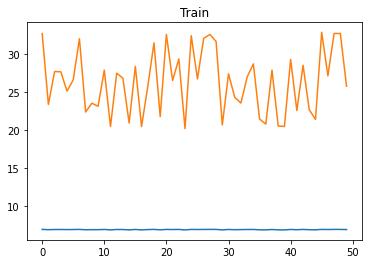

2/2 [==============================] - 7s 138ms/step


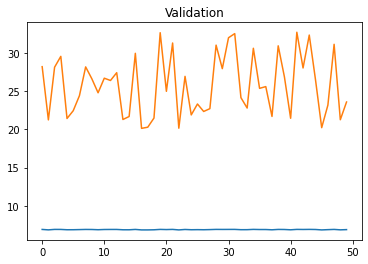

3/3 [==============================] - 0s 43ms/step


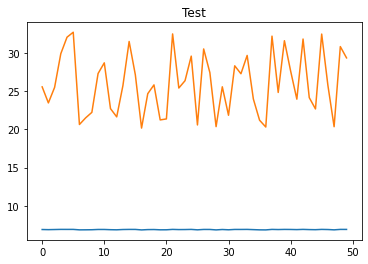

3/3 [==============================] - 0s 18ms/step


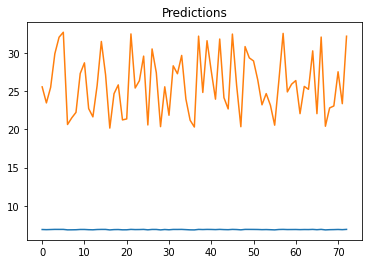

In [35]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [36]:
hybrid_cnn_gru_mse

376.78284117865746

### CNN RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 653.8831 - root_mean_squared_error: 25.5711

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 88s 5s/step - loss: 653.8831 - root_mean_squared_error: 25.5711 - val_loss: 674.5623 - val_root_mean_squared_error: 25.9723
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 639.0527 - root_mean_squared_error: 25.2795

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 635.2278 - root_mean_squared_error: 25.2037 - val_loss: 655.7964 - val_root_mean_squared_error: 25.6085
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 611.6093 - root_mean_squared_error: 24.7307

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 617.2911 - root_mean_squared_error: 24.8453 - val_loss: 638.1121 - val_root_mean_squared_error: 25.2609
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 600.3502 - root_mean_squared_error: 24.5020

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 600.3502 - root_mean_squared_error: 24.5020 - val_loss: 621.2128 - val_root_mean_squared_error: 24.9241
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 584.1774 - root_mean_squared_error: 24.1698

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 584.1774 - root_mean_squared_error: 24.1698 - val_loss: 605.0624 - val_root_mean_squared_error: 24.5980
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 568.7941 - root_mean_squared_error: 23.8494

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 61s 8s/step - loss: 568.7941 - root_mean_squared_error: 23.8494 - val_loss: 589.9164 - val_root_mean_squared_error: 24.2882
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 554.3823 - root_mean_squared_error: 23.5453

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 554.3823 - root_mean_squared_error: 23.5453 - val_loss: 575.8386 - val_root_mean_squared_error: 23.9966
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 541.0118 - root_mean_squared_error: 23.2597

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 541.0118 - root_mean_squared_error: 23.2597 - val_loss: 562.4220 - val_root_mean_squared_error: 23.7154
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 528.1048 - root_mean_squared_error: 22.9805

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 528.1048 - root_mean_squared_error: 22.9805 - val_loss: 549.4005 - val_root_mean_squared_error: 23.4393
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 515.5469 - root_mean_squared_error: 22.7057

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 515.5469 - root_mean_squared_error: 22.7057 - val_loss: 536.6093 - val_root_mean_squared_error: 23.1648
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 503.1224 - root_mean_squared_error: 22.4304

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 40s 5s/step - loss: 503.1224 - root_mean_squared_error: 22.4304 - val_loss: 524.1409 - val_root_mean_squared_error: 22.8941
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 491.2238 - root_mean_squared_error: 22.1636

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 67s 9s/step - loss: 491.2238 - root_mean_squared_error: 22.1636 - val_loss: 512.0906 - val_root_mean_squared_error: 22.6294
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 480.3521 - root_mean_squared_error: 21.9169

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 479.7837 - root_mean_squared_error: 21.9040 - val_loss: 500.8015 - val_root_mean_squared_error: 22.3786
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 472.5655 - root_mean_squared_error: 21.7386

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 469.0929 - root_mean_squared_error: 21.6586 - val_loss: 490.1690 - val_root_mean_squared_error: 22.1398
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 459.0234 - root_mean_squared_error: 21.4248

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 459.0234 - root_mean_squared_error: 21.4248 - val_loss: 480.1053 - val_root_mean_squared_error: 21.9113
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 453.3304 - root_mean_squared_error: 21.2916

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 449.3727 - root_mean_squared_error: 21.1984 - val_loss: 470.3487 - val_root_mean_squared_error: 21.6875
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 440.0968 - root_mean_squared_error: 20.9785

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 440.0968 - root_mean_squared_error: 20.9785 - val_loss: 460.9848 - val_root_mean_squared_error: 21.4706
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 431.1270 - root_mean_squared_error: 20.7636

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 431.1270 - root_mean_squared_error: 20.7636 - val_loss: 452.0156 - val_root_mean_squared_error: 21.2607
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 422.5763 - root_mean_squared_error: 20.5567

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 422.5763 - root_mean_squared_error: 20.5567 - val_loss: 443.5042 - val_root_mean_squared_error: 21.0595
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 414.5980 - root_mean_squared_error: 20.3617

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 414.5980 - root_mean_squared_error: 20.3617 - val_loss: 435.5564 - val_root_mean_squared_error: 20.8700
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 407.1810 - root_mean_squared_error: 20.1787

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 407.1810 - root_mean_squared_error: 20.1787 - val_loss: 428.3288 - val_root_mean_squared_error: 20.6961
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 400.4728 - root_mean_squared_error: 20.0118

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 400.4728 - root_mean_squared_error: 20.0118 - val_loss: 421.6951 - val_root_mean_squared_error: 20.5352
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 394.2566 - root_mean_squared_error: 19.8559

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 394.2566 - root_mean_squared_error: 19.8559 - val_loss: 415.5377 - val_root_mean_squared_error: 20.3847
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 388.4759 - root_mean_squared_error: 19.7098

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 388.4759 - root_mean_squared_error: 19.7098 - val_loss: 409.7531 - val_root_mean_squared_error: 20.2424
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 382.9699 - root_mean_squared_error: 19.5696

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 382.9699 - root_mean_squared_error: 19.5696 - val_loss: 404.2171 - val_root_mean_squared_error: 20.1052
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 377.7184 - root_mean_squared_error: 19.4350

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 377.7184 - root_mean_squared_error: 19.4350 - val_loss: 398.9153 - val_root_mean_squared_error: 19.9729
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 372.6427 - root_mean_squared_error: 19.3040

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 60s 8s/step - loss: 372.6427 - root_mean_squared_error: 19.3040 - val_loss: 393.8188 - val_root_mean_squared_error: 19.8449
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 364.2707 - root_mean_squared_error: 19.0859

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 367.7565 - root_mean_squared_error: 19.1770 - val_loss: 388.8345 - val_root_mean_squared_error: 19.7189
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 362.9882 - root_mean_squared_error: 19.0522

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 362.9882 - root_mean_squared_error: 19.0522 - val_loss: 383.9303 - val_root_mean_squared_error: 19.5941
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 358.2935 - root_mean_squared_error: 18.9286

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 7s 20ms/step


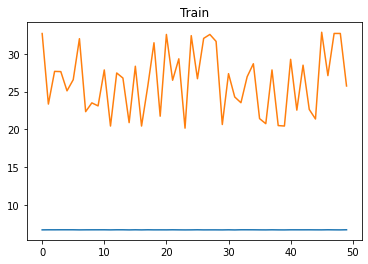

2/2 [==============================] - 5s 21ms/step


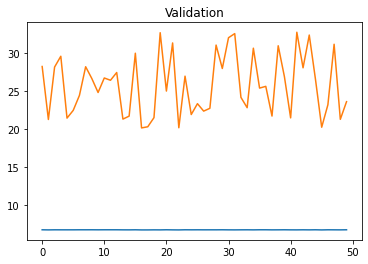

3/3 [==============================] - 0s 20ms/step


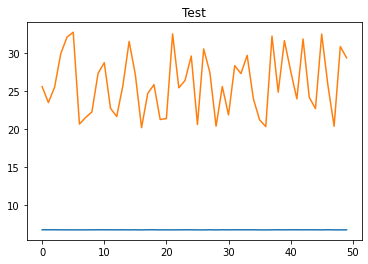

3/3 [==============================] - 0s 8ms/step


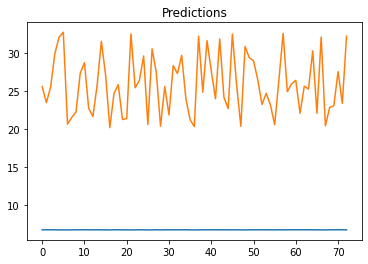

In [37]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_cnn_rnn_gru_mse

382.6646049784259

### LSTM RNN GRU

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 658.1716 - root_mean_squared_error: 25.6549

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 119s 14s/step - loss: 657.1064 - root_mean_squared_error: 25.6341 - val_loss: 674.3107 - val_root_mean_squared_error: 25.9675
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 633.0040 - root_mean_squared_error: 25.1596

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 89s 13s/step - loss: 633.0040 - root_mean_squared_error: 25.1596 - val_loss: 649.3658 - val_root_mean_squared_error: 25.4827
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 608.4067 - root_mean_squared_error: 24.6659

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 608.4067 - root_mean_squared_error: 24.6659 - val_loss: 623.5808 - val_root_mean_squared_error: 24.9716
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 582.8668 - root_mean_squared_error: 24.1426

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 582.8668 - root_mean_squared_error: 24.1426 - val_loss: 596.2703 - val_root_mean_squared_error: 24.4186
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 555.6683 - root_mean_squared_error: 23.5726

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 555.6683 - root_mean_squared_error: 23.5726 - val_loss: 567.2300 - val_root_mean_squared_error: 23.8166
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 525.9570 - root_mean_squared_error: 22.9338

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 93s 13s/step - loss: 526.5745 - root_mean_squared_error: 22.9472 - val_loss: 536.1284 - val_root_mean_squared_error: 23.1544
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 494.3778 - root_mean_squared_error: 22.2346

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 98s 14s/step - loss: 495.4947 - root_mean_squared_error: 22.2597 - val_loss: 503.2767 - val_root_mean_squared_error: 22.4338
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 463.2410 - root_mean_squared_error: 21.5230

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 463.2410 - root_mean_squared_error: 21.5230 - val_loss: 469.4287 - val_root_mean_squared_error: 21.6663
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 430.3365 - root_mean_squared_error: 20.7446

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 99s 14s/step - loss: 430.3365 - root_mean_squared_error: 20.7446 - val_loss: 435.9333 - val_root_mean_squared_error: 20.8790
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 398.2061 - root_mean_squared_error: 19.9551

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 97s 14s/step - loss: 398.2061 - root_mean_squared_error: 19.9551 - val_loss: 403.7738 - val_root_mean_squared_error: 20.0941
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 367.8745 - root_mean_squared_error: 19.1801

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 367.8745 - root_mean_squared_error: 19.1801 - val_loss: 374.2255 - val_root_mean_squared_error: 19.3449
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 339.6935 - root_mean_squared_error: 18.4308

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 116s 17s/step - loss: 340.4709 - root_mean_squared_error: 18.4519 - val_loss: 348.0051 - val_root_mean_squared_error: 18.6549
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 313.2599 - root_mean_squared_error: 17.6992

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 87s 12s/step - loss: 316.6306 - root_mean_squared_error: 17.7941 - val_loss: 325.4962 - val_root_mean_squared_error: 18.0415
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 298.4505 - root_mean_squared_error: 17.2757

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 104s 15s/step - loss: 296.3276 - root_mean_squared_error: 17.2142 - val_loss: 306.6203 - val_root_mean_squared_error: 17.5106
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 279.3717 - root_mean_squared_error: 16.7144

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 279.4920 - root_mean_squared_error: 16.7180 - val_loss: 291.1541 - val_root_mean_squared_error: 17.0632
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 265.6453 - root_mean_squared_error: 16.2986

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 265.6453 - root_mean_squared_error: 16.2986 - val_loss: 278.3830 - val_root_mean_squared_error: 16.6848
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 254.1727 - root_mean_squared_error: 15.9428

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 254.1727 - root_mean_squared_error: 15.9428 - val_loss: 267.8119 - val_root_mean_squared_error: 16.3650
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 244.6446 - root_mean_squared_error: 15.6411

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 244.6446 - root_mean_squared_error: 15.6411 - val_loss: 258.7555 - val_root_mean_squared_error: 16.0859
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 236.4768 - root_mean_squared_error: 15.3778

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 119s 17s/step - loss: 236.4768 - root_mean_squared_error: 15.3778 - val_loss: 251.0251 - val_root_mean_squared_error: 15.8438
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 226.7173 - root_mean_squared_error: 15.0571

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 91s 13s/step - loss: 229.4657 - root_mean_squared_error: 15.1481 - val_loss: 244.3942 - val_root_mean_squared_error: 15.6331
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 223.4099 - root_mean_squared_error: 14.9469

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 223.4099 - root_mean_squared_error: 14.9469 - val_loss: 238.6282 - val_root_mean_squared_error: 15.4476
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 218.1741 - root_mean_squared_error: 14.7707

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 110s 16s/step - loss: 218.1741 - root_mean_squared_error: 14.7707 - val_loss: 233.6419 - val_root_mean_squared_error: 15.2853
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 213.6655 - root_mean_squared_error: 14.6173

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 213.6655 - root_mean_squared_error: 14.6173 - val_loss: 229.2749 - val_root_mean_squared_error: 15.1418
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 207.7737 - root_mean_squared_error: 14.4144

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 209.6805 - root_mean_squared_error: 14.4803 - val_loss: 225.4734 - val_root_mean_squared_error: 15.0158
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 206.2146 - root_mean_squared_error: 14.3602

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 206.2146 - root_mean_squared_error: 14.3602 - val_loss: 222.0931 - val_root_mean_squared_error: 14.9028
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 203.1257 - root_mean_squared_error: 14.2522

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 95s 13s/step - loss: 203.1257 - root_mean_squared_error: 14.2522 - val_loss: 219.0848 - val_root_mean_squared_error: 14.8015
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 200.3551 - root_mean_squared_error: 14.1547

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 200.3551 - root_mean_squared_error: 14.1547 - val_loss: 216.3360 - val_root_mean_squared_error: 14.7084
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 197.8154 - root_mean_squared_error: 14.0647

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 109s 15s/step - loss: 197.8154 - root_mean_squared_error: 14.0647 - val_loss: 213.8134 - val_root_mean_squared_error: 14.6224
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 195.4536 - root_mean_squared_error: 13.9805

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 91s 13s/step - loss: 195.4536 - root_mean_squared_error: 13.9805 - val_loss: 211.4828 - val_root_mean_squared_error: 14.5424
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 193.2847 - root_mean_squared_error: 13.9027

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 4s 10ms/step


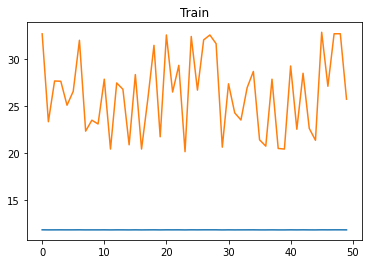

2/2 [==============================] - 9s 22ms/step


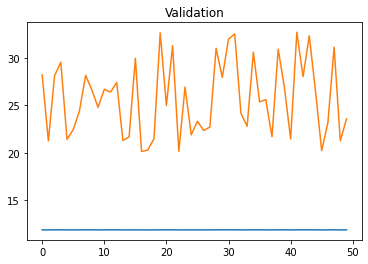

3/3 [==============================] - 3s 317ms/step


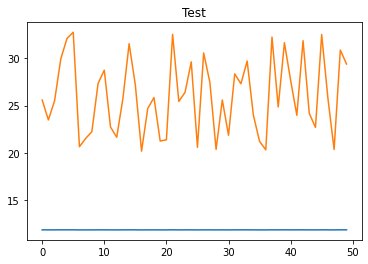

3/3 [==============================] - 0s 8ms/step


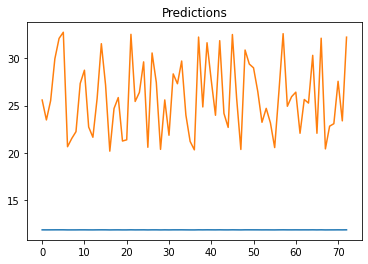

In [39]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_lstm_rnn_gru_mse

211.92444398516176

## Moving Average

### CNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 620.7031 - root_mean_squared_error: 24.9139

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 153s 16s/step - loss: 620.7031 - root_mean_squared_error: 24.9139 - val_loss: 642.3829 - val_root_mean_squared_error: 25.3453
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 603.6828 - root_mean_squared_error: 24.5700

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 603.6828 - root_mean_squared_error: 24.5700 - val_loss: 625.7011 - val_root_mean_squared_error: 25.0140
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 586.2013 - root_mean_squared_error: 24.2116

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 587.0696 - root_mean_squared_error: 24.2295 - val_loss: 608.3048 - val_root_mean_squared_error: 24.6638
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 566.7823 - root_mean_squared_error: 23.8072

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 12s/step - loss: 568.9952 - root_mean_squared_error: 23.8536 - val_loss: 587.9633 - val_root_mean_squared_error: 24.2480
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 549.0881 - root_mean_squared_error: 23.4326

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 549.0881 - root_mean_squared_error: 23.4326 - val_loss: 568.7695 - val_root_mean_squared_error: 23.8489
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 532.4675 - root_mean_squared_error: 23.0753

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 89s 12s/step - loss: 532.4675 - root_mean_squared_error: 23.0753 - val_loss: 553.6726 - val_root_mean_squared_error: 23.5302
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 515.0654 - root_mean_squared_error: 22.6951

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 93s 13s/step - loss: 518.4253 - root_mean_squared_error: 22.7690 - val_loss: 540.1563 - val_root_mean_squared_error: 23.2413
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 505.8330 - root_mean_squared_error: 22.4907

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 14s/step - loss: 505.8330 - root_mean_squared_error: 22.4907 - val_loss: 527.9217 - val_root_mean_squared_error: 22.9765
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 494.3012 - root_mean_squared_error: 22.2329

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 82s 12s/step - loss: 494.3012 - root_mean_squared_error: 22.2329 - val_loss: 516.5861 - val_root_mean_squared_error: 22.7285
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 483.4324 - root_mean_squared_error: 21.9871

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 483.4553 - root_mean_squared_error: 21.9876 - val_loss: 505.7346 - val_root_mean_squared_error: 22.4885
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 472.9417 - root_mean_squared_error: 21.7472

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 472.9417 - root_mean_squared_error: 21.7472 - val_loss: 495.1218 - val_root_mean_squared_error: 22.2513
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 462.7403 - root_mean_squared_error: 21.5114

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 108s 15s/step - loss: 462.7403 - root_mean_squared_error: 21.5114 - val_loss: 484.8341 - val_root_mean_squared_error: 22.0189
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 452.9323 - root_mean_squared_error: 21.2822

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 452.9323 - root_mean_squared_error: 21.2822 - val_loss: 475.0694 - val_root_mean_squared_error: 21.7961
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 443.6432 - root_mean_squared_error: 21.0628

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 12s/step - loss: 443.6432 - root_mean_squared_error: 21.0628 - val_loss: 465.7179 - val_root_mean_squared_error: 21.5805
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 430.9946 - root_mean_squared_error: 20.7604

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 11s/step - loss: 434.6481 - root_mean_squared_error: 20.8482 - val_loss: 456.8369 - val_root_mean_squared_error: 21.3737
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 426.3498 - root_mean_squared_error: 20.6482

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 88s 11s/step - loss: 426.3498 - root_mean_squared_error: 20.6482 - val_loss: 448.5157 - val_root_mean_squared_error: 21.1782
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 418.5534 - root_mean_squared_error: 20.4586

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 418.5534 - root_mean_squared_error: 20.4586 - val_loss: 440.9245 - val_root_mean_squared_error: 20.9982
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 411.4557 - root_mean_squared_error: 20.2844

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 411.4557 - root_mean_squared_error: 20.2844 - val_loss: 433.8718 - val_root_mean_squared_error: 20.8296
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 404.7998 - root_mean_squared_error: 20.1196

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 71s 10s/step - loss: 404.7998 - root_mean_squared_error: 20.1196 - val_loss: 427.3030 - val_root_mean_squared_error: 20.6713
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 398.5769 - root_mean_squared_error: 19.9644

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 98s 14s/step - loss: 398.5769 - root_mean_squared_error: 19.9644 - val_loss: 421.1473 - val_root_mean_squared_error: 20.5219
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 394.7097 - root_mean_squared_error: 19.8673

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 392.7578 - root_mean_squared_error: 19.8181 - val_loss: 415.3203 - val_root_mean_squared_error: 20.3794
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 387.2915 - root_mean_squared_error: 19.6797

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 93s 13s/step - loss: 387.2915 - root_mean_squared_error: 19.6797 - val_loss: 409.8410 - val_root_mean_squared_error: 20.2445
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 381.4200 - root_mean_squared_error: 19.5300

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 88s 13s/step - loss: 382.0583 - root_mean_squared_error: 19.5463 - val_loss: 404.6728 - val_root_mean_squared_error: 20.1165
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 374.9890 - root_mean_squared_error: 19.3646

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 11s/step - loss: 377.1712 - root_mean_squared_error: 19.4209 - val_loss: 399.7741 - val_root_mean_squared_error: 19.9944
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 372.5509 - root_mean_squared_error: 19.3016

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 372.5509 - root_mean_squared_error: 19.3016 - val_loss: 395.1507 - val_root_mean_squared_error: 19.8784
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 368.1611 - root_mean_squared_error: 19.1875

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 103s 14s/step - loss: 368.1997 - root_mean_squared_error: 19.1885 - val_loss: 390.8038 - val_root_mean_squared_error: 19.7688
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 364.1166 - root_mean_squared_error: 19.0818

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 364.1166 - root_mean_squared_error: 19.0818 - val_loss: 386.7098 - val_root_mean_squared_error: 19.6649
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 360.2337 - root_mean_squared_error: 18.9798

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 360.2337 - root_mean_squared_error: 18.9798 - val_loss: 382.8787 - val_root_mean_squared_error: 19.5673
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 356.6331 - root_mean_squared_error: 18.8847

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 92s 13s/step - loss: 356.6331 - root_mean_squared_error: 18.8847 - val_loss: 379.2491 - val_root_mean_squared_error: 19.4743
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 353.2141 - root_mean_squared_error: 18.7940

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 10s 58ms/step


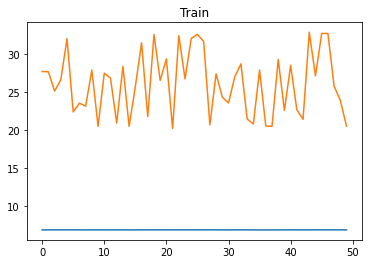

2/2 [==============================] - 20s 33ms/step


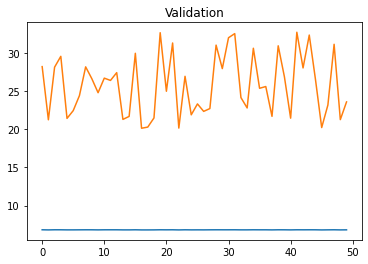

3/3 [==============================] - 0s 23ms/step


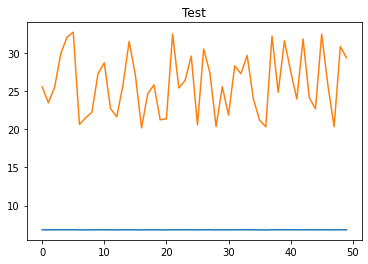

3/3 [==============================] - 0s 21ms/step


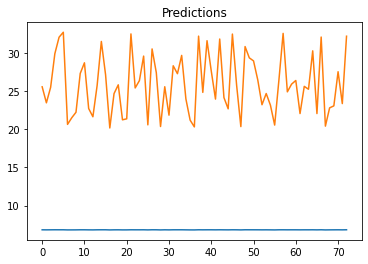

In [41]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [42]:
mavg_hybrid_cnn_lstm_mse

379.29720559840894

### RNN LSTM

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 646.2657 - root_mean_squared_error: 25.4218

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 85s 8s/step - loss: 649.7692 - root_mean_squared_error: 25.4906 - val_loss: 678.4901 - val_root_mean_squared_error: 26.0478
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 642.2170 - root_mean_squared_error: 25.3420

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 64s 9s/step - loss: 642.2170 - root_mean_squared_error: 25.3420 - val_loss: 670.9781 - val_root_mean_squared_error: 25.9032
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 635.0186 - root_mean_squared_error: 25.1996

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 635.0186 - root_mean_squared_error: 25.1996 - val_loss: 663.7309 - val_root_mean_squared_error: 25.7630
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 628.0125 - root_mean_squared_error: 25.0602

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 61s 9s/step - loss: 628.0125 - root_mean_squared_error: 25.0602 - val_loss: 656.7202 - val_root_mean_squared_error: 25.6266
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 621.1780 - root_mean_squared_error: 24.9234

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 39s 5s/step - loss: 621.1780 - root_mean_squared_error: 24.9234 - val_loss: 649.7752 - val_root_mean_squared_error: 25.4907
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 614.3820 - root_mean_squared_error: 24.7867

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 614.3820 - root_mean_squared_error: 24.7867 - val_loss: 642.7364 - val_root_mean_squared_error: 25.3522
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 610.4843 - root_mean_squared_error: 24.7080

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 56s 8s/step - loss: 607.4568 - root_mean_squared_error: 24.6466 - val_loss: 635.5403 - val_root_mean_squared_error: 25.2099
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 601.3613 - root_mean_squared_error: 24.5227

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 600.3542 - root_mean_squared_error: 24.5021 - val_loss: 628.1024 - val_root_mean_squared_error: 25.0620
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 592.9606 - root_mean_squared_error: 24.3508

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 592.9606 - root_mean_squared_error: 24.3508 - val_loss: 620.3582 - val_root_mean_squared_error: 24.9070
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 585.3237 - root_mean_squared_error: 24.1935

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 61s 9s/step - loss: 585.3237 - root_mean_squared_error: 24.1935 - val_loss: 612.2570 - val_root_mean_squared_error: 24.7438
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 577.2880 - root_mean_squared_error: 24.0268

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 577.2880 - root_mean_squared_error: 24.0268 - val_loss: 603.8654 - val_root_mean_squared_error: 24.5737
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 568.7535 - root_mean_squared_error: 23.8486

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 569.0045 - root_mean_squared_error: 23.8538 - val_loss: 595.1953 - val_root_mean_squared_error: 24.3966
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 573.3427 - root_mean_squared_error: 23.9446

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 66s 9s/step - loss: 560.4636 - root_mean_squared_error: 23.6741 - val_loss: 586.2729 - val_root_mean_squared_error: 24.2131
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 544.7919 - root_mean_squared_error: 23.3408

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 551.6696 - root_mean_squared_error: 23.4876 - val_loss: 577.2084 - val_root_mean_squared_error: 24.0252
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 544.4518 - root_mean_squared_error: 23.3335

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 542.8152 - root_mean_squared_error: 23.2984 - val_loss: 567.8785 - val_root_mean_squared_error: 23.8302
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 533.6944 - root_mean_squared_error: 23.1018

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 533.6944 - root_mean_squared_error: 23.1018 - val_loss: 558.5767 - val_root_mean_squared_error: 23.6342
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 524.6832 - root_mean_squared_error: 22.9060

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 524.6832 - root_mean_squared_error: 22.9060 - val_loss: 549.2672 - val_root_mean_squared_error: 23.4365
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 515.6560 - root_mean_squared_error: 22.7081

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 515.6560 - root_mean_squared_error: 22.7081 - val_loss: 540.0655 - val_root_mean_squared_error: 23.2393
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 504.8087 - root_mean_squared_error: 22.4679

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 53s 8s/step - loss: 506.8027 - root_mean_squared_error: 22.5123 - val_loss: 531.0273 - val_root_mean_squared_error: 23.0440
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 498.0756 - root_mean_squared_error: 22.3176

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 39s 5s/step - loss: 498.0756 - root_mean_squared_error: 22.3176 - val_loss: 522.2131 - val_root_mean_squared_error: 22.8520
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 489.6210 - root_mean_squared_error: 22.1274

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 489.6210 - root_mean_squared_error: 22.1274 - val_loss: 513.6429 - val_root_mean_squared_error: 22.6637
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 482.8649 - root_mean_squared_error: 21.9742

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 481.4179 - root_mean_squared_error: 21.9412 - val_loss: 505.4110 - val_root_mean_squared_error: 22.4813
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 472.1379 - root_mean_squared_error: 21.7287

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 473.5708 - root_mean_squared_error: 21.7617 - val_loss: 497.5478 - val_root_mean_squared_error: 22.3058
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 465.2420 - root_mean_squared_error: 21.5695

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 466.0648 - root_mean_squared_error: 21.5885 - val_loss: 490.0063 - val_root_mean_squared_error: 22.1361
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 458.8719 - root_mean_squared_error: 21.4213

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 458.8719 - root_mean_squared_error: 21.4213 - val_loss: 482.8059 - val_root_mean_squared_error: 21.9728
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 460.2236 - root_mean_squared_error: 21.4528

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 452.0122 - root_mean_squared_error: 21.2606 - val_loss: 475.9402 - val_root_mean_squared_error: 21.8161
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 444.4331 - root_mean_squared_error: 21.0816

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 445.4681 - root_mean_squared_error: 21.1061 - val_loss: 469.3837 - val_root_mean_squared_error: 21.6653
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 440.5245 - root_mean_squared_error: 20.9887

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 439.2375 - root_mean_squared_error: 20.9580 - val_loss: 463.0808 - val_root_mean_squared_error: 21.5193
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 434.0062 - root_mean_squared_error: 20.8328

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 433.2370 - root_mean_squared_error: 20.8143 - val_loss: 457.0840 - val_root_mean_squared_error: 21.3795
Epoch 30/30
5/8 [=================>............] - ETA: 0s - loss: 418.1647 - root_mean_squared_error: 20.4491

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 3s 60ms/step


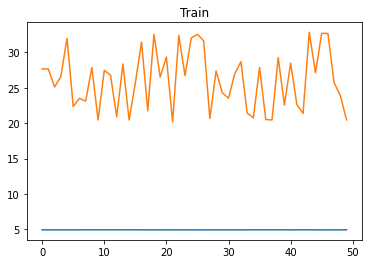

2/2 [==============================] - 6s 272ms/step


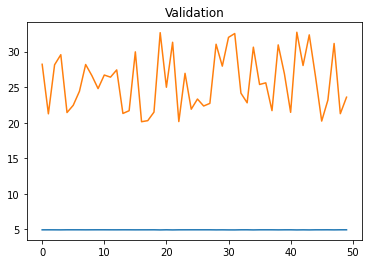

3/3 [==============================] - 0s 18ms/step


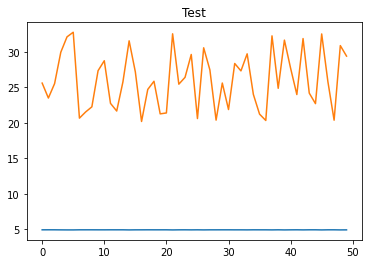

3/3 [==============================] - 0s 11ms/step


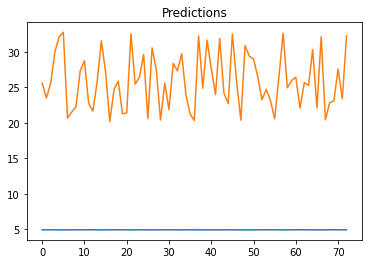

In [43]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [44]:
mavg_hybrid_rnn_lstm_mse

455.13640442977646

### RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 643.9102 - root_mean_squared_error: 25.3754

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 70s 8s/step - loss: 643.9102 - root_mean_squared_error: 25.3754 - val_loss: 669.3404 - val_root_mean_squared_error: 25.8716
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 632.1573 - root_mean_squared_error: 25.1427

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 631.5776 - root_mean_squared_error: 25.1312 - val_loss: 656.9386 - val_root_mean_squared_error: 25.6308
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 618.0566 - root_mean_squared_error: 24.8607

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 619.4819 - root_mean_squared_error: 24.8894 - val_loss: 644.8127 - val_root_mean_squared_error: 25.3932
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 607.7270 - root_mean_squared_error: 24.6521

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 607.7270 - root_mean_squared_error: 24.6521 - val_loss: 632.9902 - val_root_mean_squared_error: 25.1593
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 596.3761 - root_mean_squared_error: 24.4208

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 596.3761 - root_mean_squared_error: 24.4208 - val_loss: 621.5059 - val_root_mean_squared_error: 24.9300
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 587.7029 - root_mean_squared_error: 24.2426

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 585.3574 - root_mean_squared_error: 24.1942 - val_loss: 610.4191 - val_root_mean_squared_error: 24.7067
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 577.6606 - root_mean_squared_error: 24.0346

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 574.7159 - root_mean_squared_error: 23.9732 - val_loss: 599.7459 - val_root_mean_squared_error: 24.4897
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 564.4379 - root_mean_squared_error: 23.7579

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 564.4379 - root_mean_squared_error: 23.7579 - val_loss: 589.4406 - val_root_mean_squared_error: 24.2784
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 554.5674 - root_mean_squared_error: 23.5493

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 554.5377 - root_mean_squared_error: 23.5486 - val_loss: 579.4863 - val_root_mean_squared_error: 24.0725
Epoch 10/30
5/8 [=================>............] - ETA: 1s - loss: 553.0392 - root_mean_squared_error: 23.5168

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 544.9854 - root_mean_squared_error: 23.3449 - val_loss: 569.9091 - val_root_mean_squared_error: 23.8728
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 535.7508 - root_mean_squared_error: 23.1463

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 535.7508 - root_mean_squared_error: 23.1463 - val_loss: 560.6762 - val_root_mean_squared_error: 23.6786
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 527.1993 - root_mean_squared_error: 22.9608

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 526.8646 - root_mean_squared_error: 22.9535 - val_loss: 551.6508 - val_root_mean_squared_error: 23.4872
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 518.2025 - root_mean_squared_error: 22.7641

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 518.2025 - root_mean_squared_error: 22.7641 - val_loss: 542.9363 - val_root_mean_squared_error: 23.3010
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 509.8516 - root_mean_squared_error: 22.5799

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 509.8516 - root_mean_squared_error: 22.5799 - val_loss: 534.4803 - val_root_mean_squared_error: 23.1188
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 500.9684 - root_mean_squared_error: 22.3823

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 501.7318 - root_mean_squared_error: 22.3994 - val_loss: 526.3287 - val_root_mean_squared_error: 22.9419
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 488.9460 - root_mean_squared_error: 22.1121

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 493.8979 - root_mean_squared_error: 22.2238 - val_loss: 518.4562 - val_root_mean_squared_error: 22.7696
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 486.5589 - root_mean_squared_error: 22.0581

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 46s 6s/step - loss: 486.3251 - root_mean_squared_error: 22.0528 - val_loss: 510.8606 - val_root_mean_squared_error: 22.6022
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 479.0639 - root_mean_squared_error: 21.8875

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 479.0639 - root_mean_squared_error: 21.8875 - val_loss: 503.5510 - val_root_mean_squared_error: 22.4399
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 472.0978 - root_mean_squared_error: 21.7278

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 472.0978 - root_mean_squared_error: 21.7278 - val_loss: 496.5415 - val_root_mean_squared_error: 22.2832
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 465.3720 - root_mean_squared_error: 21.5725

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 465.3720 - root_mean_squared_error: 21.5725 - val_loss: 489.8057 - val_root_mean_squared_error: 22.1316
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 457.6665 - root_mean_squared_error: 21.3931

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 458.9394 - root_mean_squared_error: 21.4229 - val_loss: 483.3518 - val_root_mean_squared_error: 21.9853
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 461.0045 - root_mean_squared_error: 21.4710

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 452.7852 - root_mean_squared_error: 21.2787 - val_loss: 477.1709 - val_root_mean_squared_error: 21.8442
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 446.1776 - root_mean_squared_error: 21.1229

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 446.8819 - root_mean_squared_error: 21.1396 - val_loss: 471.3050 - val_root_mean_squared_error: 21.7096
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 441.2729 - root_mean_squared_error: 21.0065

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 441.2729 - root_mean_squared_error: 21.0065 - val_loss: 465.6694 - val_root_mean_squared_error: 21.5794
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 435.8732 - root_mean_squared_error: 20.8776

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 435.8732 - root_mean_squared_error: 20.8776 - val_loss: 460.2965 - val_root_mean_squared_error: 21.4545
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 428.3564 - root_mean_squared_error: 20.6968

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 430.7087 - root_mean_squared_error: 20.7535 - val_loss: 455.1389 - val_root_mean_squared_error: 21.3340
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 422.4362 - root_mean_squared_error: 20.5533

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 425.7264 - root_mean_squared_error: 20.6331 - val_loss: 450.1672 - val_root_mean_squared_error: 21.2171
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 424.7113 - root_mean_squared_error: 20.6085

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 420.9563 - root_mean_squared_error: 20.5172 - val_loss: 445.4109 - val_root_mean_squared_error: 21.1048
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 413.7365 - root_mean_squared_error: 20.3405

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 416.4218 - root_mean_squared_error: 20.4064 - val_loss: 440.9240 - val_root_mean_squared_error: 20.9982
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 412.1189 - root_mean_squared_error: 20.3007

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 100ms/step


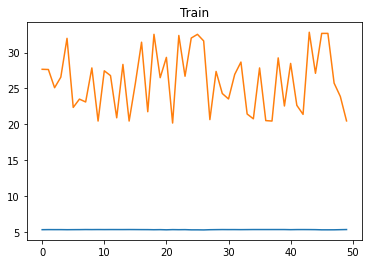

2/2 [==============================] - 5s 66ms/step


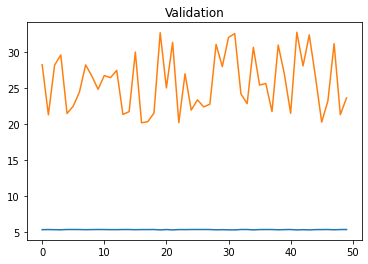

3/3 [==============================] - 0s 9ms/step


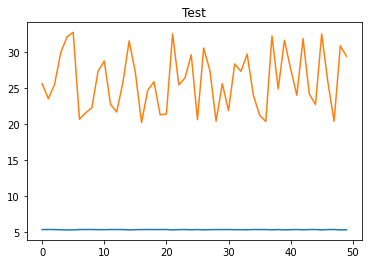

3/3 [==============================] - 0s 23ms/step


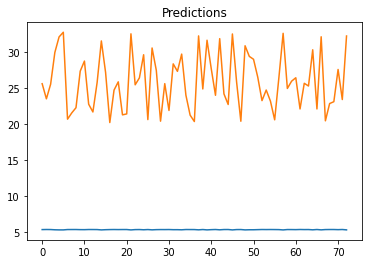

In [45]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [46]:
mavg_hybrid_rnn_gru_mse

440.3787053203207

### CNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 658.5521 - root_mean_squared_error: 25.6623

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 156s 15s/step - loss: 658.5521 - root_mean_squared_error: 25.6623 - val_loss: 676.1617 - val_root_mean_squared_error: 26.0031
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 633.4814 - root_mean_squared_error: 25.1691

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 92s 13s/step - loss: 633.4814 - root_mean_squared_error: 25.1691 - val_loss: 651.2563 - val_root_mean_squared_error: 25.5197
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 608.9551 - root_mean_squared_error: 24.6770

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 61s 9s/step - loss: 609.3027 - root_mean_squared_error: 24.6841 - val_loss: 626.9109 - val_root_mean_squared_error: 25.0382
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 585.5178 - root_mean_squared_error: 24.1975

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 89s 13s/step - loss: 585.5178 - root_mean_squared_error: 24.1975 - val_loss: 602.6082 - val_root_mean_squared_error: 24.5481
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 564.5173 - root_mean_squared_error: 23.7596

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 91s 13s/step - loss: 561.6395 - root_mean_squared_error: 23.6989 - val_loss: 578.2548 - val_root_mean_squared_error: 24.0469
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 537.8507 - root_mean_squared_error: 23.1916

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 537.8507 - root_mean_squared_error: 23.1916 - val_loss: 554.3539 - val_root_mean_squared_error: 23.5447
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 517.1390 - root_mean_squared_error: 22.7407

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 81s 12s/step - loss: 515.2467 - root_mean_squared_error: 22.6990 - val_loss: 532.1412 - val_root_mean_squared_error: 23.0682
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 494.7037 - root_mean_squared_error: 22.2419

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 494.7037 - root_mean_squared_error: 22.2419 - val_loss: 512.4605 - val_root_mean_squared_error: 22.6376
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 476.5392 - root_mean_squared_error: 21.8298

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 476.5392 - root_mean_squared_error: 21.8298 - val_loss: 495.1479 - val_root_mean_squared_error: 22.2519
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 460.4139 - root_mean_squared_error: 21.4573

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 98s 14s/step - loss: 460.4139 - root_mean_squared_error: 21.4573 - val_loss: 479.5715 - val_root_mean_squared_error: 21.8991
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 445.6256 - root_mean_squared_error: 21.1098

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 445.6256 - root_mean_squared_error: 21.1098 - val_loss: 465.0815 - val_root_mean_squared_error: 21.5657
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 431.7179 - root_mean_squared_error: 20.7778

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 81s 12s/step - loss: 431.7179 - root_mean_squared_error: 20.7778 - val_loss: 451.3953 - val_root_mean_squared_error: 21.2461
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 418.7918 - root_mean_squared_error: 20.4644

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 418.7918 - root_mean_squared_error: 20.4644 - val_loss: 438.8242 - val_root_mean_squared_error: 20.9481
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 407.0529 - root_mean_squared_error: 20.1756

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 407.0529 - root_mean_squared_error: 20.1756 - val_loss: 427.4060 - val_root_mean_squared_error: 20.6738
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 396.3735 - root_mean_squared_error: 19.9091

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 396.3735 - root_mean_squared_error: 19.9091 - val_loss: 416.9906 - val_root_mean_squared_error: 20.4203
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 386.5974 - root_mean_squared_error: 19.6621

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 60s 9s/step - loss: 386.5974 - root_mean_squared_error: 19.6621 - val_loss: 407.4135 - val_root_mean_squared_error: 20.1845
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 377.6405 - root_mean_squared_error: 19.4330

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 377.6405 - root_mean_squared_error: 19.4330 - val_loss: 398.7515 - val_root_mean_squared_error: 19.9688
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 369.6823 - root_mean_squared_error: 19.2271

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 369.6823 - root_mean_squared_error: 19.2271 - val_loss: 390.9323 - val_root_mean_squared_error: 19.7720
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 362.6004 - root_mean_squared_error: 19.0421

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 362.6004 - root_mean_squared_error: 19.0421 - val_loss: 384.0992 - val_root_mean_squared_error: 19.5984
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 356.4272 - root_mean_squared_error: 18.8793

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 88s 13s/step - loss: 356.4272 - root_mean_squared_error: 18.8793 - val_loss: 378.1679 - val_root_mean_squared_error: 19.4465
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 353.3535 - root_mean_squared_error: 18.7977

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 351.0865 - root_mean_squared_error: 18.7373 - val_loss: 372.9830 - val_root_mean_squared_error: 19.3128
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 346.3551 - root_mean_squared_error: 18.6106

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 346.3551 - root_mean_squared_error: 18.6106 - val_loss: 368.3707 - val_root_mean_squared_error: 19.1930
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 342.0917 - root_mean_squared_error: 18.4957

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 342.0917 - root_mean_squared_error: 18.4957 - val_loss: 364.1496 - val_root_mean_squared_error: 19.0827
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 338.1527 - root_mean_squared_error: 18.3889

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 101s 14s/step - loss: 338.1527 - root_mean_squared_error: 18.3889 - val_loss: 360.2509 - val_root_mean_squared_error: 18.9803
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 334.4693 - root_mean_squared_error: 18.2885

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 334.4693 - root_mean_squared_error: 18.2885 - val_loss: 356.5625 - val_root_mean_squared_error: 18.8829
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 330.9711 - root_mean_squared_error: 18.1926

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 330.9711 - root_mean_squared_error: 18.1926 - val_loss: 353.0989 - val_root_mean_squared_error: 18.7909
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 327.6980 - root_mean_squared_error: 18.1024

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 327.6980 - root_mean_squared_error: 18.1024 - val_loss: 349.8210 - val_root_mean_squared_error: 18.7035
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 324.5960 - root_mean_squared_error: 18.0165

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 97s 14s/step - loss: 324.5960 - root_mean_squared_error: 18.0165 - val_loss: 346.7542 - val_root_mean_squared_error: 18.6213
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 321.6925 - root_mean_squared_error: 17.9358

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 321.6925 - root_mean_squared_error: 17.9358 - val_loss: 343.8864 - val_root_mean_squared_error: 18.5442
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 319.0147 - root_mean_squared_error: 17.8610

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 6s 96ms/step


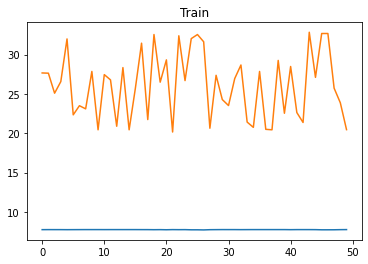

2/2 [==============================] - 11s 38ms/step


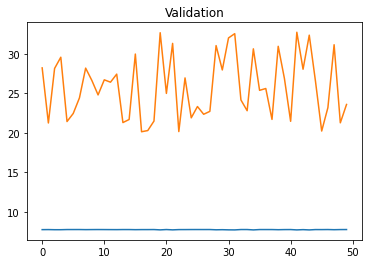

3/3 [==============================] - 0s 26ms/step


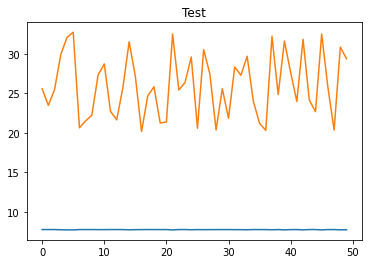

3/3 [==============================] - 0s 12ms/step


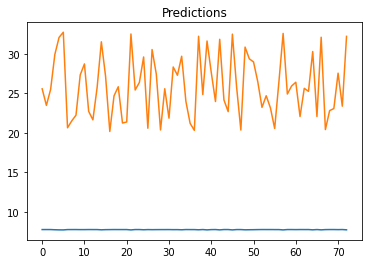

In [47]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [48]:
mavg_hybrid_cnn_gru_mse

344.5126280540909

### CNN RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 628.1613 - root_mean_squared_error: 25.0631

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 112s 10s/step - loss: 628.1613 - root_mean_squared_error: 25.0631 - val_loss: 637.9875 - val_root_mean_squared_error: 25.2584
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 592.6467 - root_mean_squared_error: 24.3443

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 592.6467 - root_mean_squared_error: 24.3443 - val_loss: 603.2266 - val_root_mean_squared_error: 24.5607
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 557.5732 - root_mean_squared_error: 23.6130

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 56s 7s/step - loss: 559.9912 - root_mean_squared_error: 23.6641 - val_loss: 572.1216 - val_root_mean_squared_error: 23.9191
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 530.9493 - root_mean_squared_error: 23.0423

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 530.9493 - root_mean_squared_error: 23.0423 - val_loss: 543.6804 - val_root_mean_squared_error: 23.3170
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 504.0278 - root_mean_squared_error: 22.4506

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 504.0278 - root_mean_squared_error: 22.4506 - val_loss: 517.4590 - val_root_mean_squared_error: 22.7477
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 479.2068 - root_mean_squared_error: 21.8908

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 479.2068 - root_mean_squared_error: 21.8908 - val_loss: 493.0208 - val_root_mean_squared_error: 22.2041
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 455.9306 - root_mean_squared_error: 21.3525

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 455.9306 - root_mean_squared_error: 21.3525 - val_loss: 469.9983 - val_root_mean_squared_error: 21.6794
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 434.0385 - root_mean_squared_error: 20.8336

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 434.0385 - root_mean_squared_error: 20.8336 - val_loss: 448.1766 - val_root_mean_squared_error: 21.1702
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 413.1311 - root_mean_squared_error: 20.3256

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 413.1311 - root_mean_squared_error: 20.3256 - val_loss: 427.0155 - val_root_mean_squared_error: 20.6644
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 392.8490 - root_mean_squared_error: 19.8204

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 392.8490 - root_mean_squared_error: 19.8204 - val_loss: 406.6667 - val_root_mean_squared_error: 20.1660
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 373.3311 - root_mean_squared_error: 19.3218

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 373.3311 - root_mean_squared_error: 19.3218 - val_loss: 387.0143 - val_root_mean_squared_error: 19.6727
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 354.7185 - root_mean_squared_error: 18.8340

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 55s 7s/step - loss: 354.7185 - root_mean_squared_error: 18.8340 - val_loss: 368.3644 - val_root_mean_squared_error: 19.1928
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 337.0276 - root_mean_squared_error: 18.3583

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 337.0276 - root_mean_squared_error: 18.3583 - val_loss: 350.8659 - val_root_mean_squared_error: 18.7314
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 321.1825 - root_mean_squared_error: 17.9216

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 320.5515 - root_mean_squared_error: 17.9040 - val_loss: 334.5990 - val_root_mean_squared_error: 18.2920
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 305.4583 - root_mean_squared_error: 17.4774

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 305.4583 - root_mean_squared_error: 17.4774 - val_loss: 319.8056 - val_root_mean_squared_error: 17.8831
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 291.8406 - root_mean_squared_error: 17.0833

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 291.8406 - root_mean_squared_error: 17.0833 - val_loss: 306.4959 - val_root_mean_squared_error: 17.5070
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 280.6154 - root_mean_squared_error: 16.7516

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 279.5004 - root_mean_squared_error: 16.7183 - val_loss: 294.2144 - val_root_mean_squared_error: 17.1527
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 268.6253 - root_mean_squared_error: 16.3898

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 267.9989 - root_mean_squared_error: 16.3707 - val_loss: 282.9387 - val_root_mean_squared_error: 16.8208
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 256.7781 - root_mean_squared_error: 16.0243

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 257.3594 - root_mean_squared_error: 16.0424 - val_loss: 272.2404 - val_root_mean_squared_error: 16.4997
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 247.1537 - root_mean_squared_error: 15.7211

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 247.1537 - root_mean_squared_error: 15.7211 - val_loss: 261.9781 - val_root_mean_squared_error: 16.1857
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 236.6612 - root_mean_squared_error: 15.3838

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 237.3980 - root_mean_squared_error: 15.4077 - val_loss: 252.1919 - val_root_mean_squared_error: 15.8806
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 228.1314 - root_mean_squared_error: 15.1040

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 228.1314 - root_mean_squared_error: 15.1040 - val_loss: 242.8683 - val_root_mean_squared_error: 15.5842
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 219.4546 - root_mean_squared_error: 14.8140

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 219.4546 - root_mean_squared_error: 14.8140 - val_loss: 234.2212 - val_root_mean_squared_error: 15.3043
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 211.5888 - root_mean_squared_error: 14.5461

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 211.5888 - root_mean_squared_error: 14.5461 - val_loss: 226.2647 - val_root_mean_squared_error: 15.0421
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 204.3058 - root_mean_squared_error: 14.2936

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 204.3058 - root_mean_squared_error: 14.2936 - val_loss: 218.9540 - val_root_mean_squared_error: 14.7971
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 197.6139 - root_mean_squared_error: 14.0575

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 197.6139 - root_mean_squared_error: 14.0575 - val_loss: 212.1427 - val_root_mean_squared_error: 14.5651
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 191.3069 - root_mean_squared_error: 13.8314

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 191.3069 - root_mean_squared_error: 13.8314 - val_loss: 205.8105 - val_root_mean_squared_error: 14.3461
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 185.4661 - root_mean_squared_error: 13.6186

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 185.4661 - root_mean_squared_error: 13.6186 - val_loss: 199.7567 - val_root_mean_squared_error: 14.1335
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 180.3888 - root_mean_squared_error: 13.4309

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 179.8479 - root_mean_squared_error: 13.4107 - val_loss: 194.0548 - val_root_mean_squared_error: 13.9304
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 175.6850 - root_mean_squared_error: 13.2546

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 2s 25ms/step


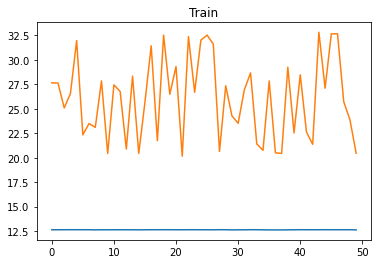

2/2 [==============================] - 2s 21ms/step


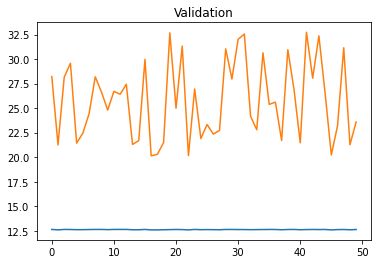

3/3 [==============================] - 1s 407ms/step


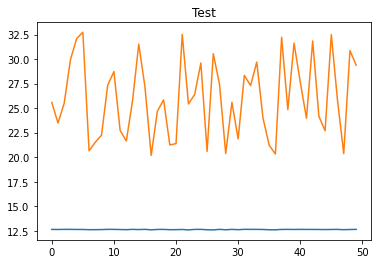

3/3 [==============================] - 2s 415ms/step


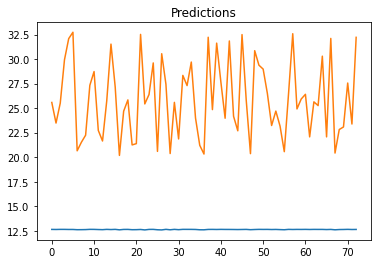

In [49]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [50]:
mavg_hybrid_cnn_rnn_gru_mse

191.22835729388242

### RNN LSTM GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 642.2700 - root_mean_squared_error: 25.3430

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 81s 8s/step - loss: 644.2556 - root_mean_squared_error: 25.3822 - val_loss: 664.4018 - val_root_mean_squared_error: 25.7760
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 623.3995 - root_mean_squared_error: 24.9680

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 623.3995 - root_mean_squared_error: 24.9680 - val_loss: 642.6615 - val_root_mean_squared_error: 25.3508
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 601.7799 - root_mean_squared_error: 24.5312

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 601.7799 - root_mean_squared_error: 24.5312 - val_loss: 619.4960 - val_root_mean_squared_error: 24.8897
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 578.4255 - root_mean_squared_error: 24.0505

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 578.4255 - root_mean_squared_error: 24.0505 - val_loss: 593.9803 - val_root_mean_squared_error: 24.3717
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 553.4154 - root_mean_squared_error: 23.5248

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 552.4545 - root_mean_squared_error: 23.5044 - val_loss: 565.5544 - val_root_mean_squared_error: 23.7814
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 523.7666 - root_mean_squared_error: 22.8859

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 69s 9s/step - loss: 523.7666 - root_mean_squared_error: 22.8859 - val_loss: 533.9683 - val_root_mean_squared_error: 23.1078
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 490.5897 - root_mean_squared_error: 22.1493

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 491.8880 - root_mean_squared_error: 22.1785 - val_loss: 499.9740 - val_root_mean_squared_error: 22.3601
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 458.3496 - root_mean_squared_error: 21.4091

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 458.3496 - root_mean_squared_error: 21.4091 - val_loss: 464.4246 - val_root_mean_squared_error: 21.5505
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 431.0770 - root_mean_squared_error: 20.7624

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 423.9549 - root_mean_squared_error: 20.5902 - val_loss: 429.3604 - val_root_mean_squared_error: 20.7210
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 396.1873 - root_mean_squared_error: 19.9045

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 390.6122 - root_mean_squared_error: 19.7639 - val_loss: 396.6118 - val_root_mean_squared_error: 19.9151
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 360.2169 - root_mean_squared_error: 18.9794

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 360.2169 - root_mean_squared_error: 18.9794 - val_loss: 367.2606 - val_root_mean_squared_error: 19.1640
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 333.2581 - root_mean_squared_error: 18.2554

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 333.2581 - root_mean_squared_error: 18.2554 - val_loss: 342.1406 - val_root_mean_squared_error: 18.4970
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 310.8643 - root_mean_squared_error: 17.6313

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 310.8643 - root_mean_squared_error: 17.6313 - val_loss: 321.5229 - val_root_mean_squared_error: 17.9311
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 293.2733 - root_mean_squared_error: 17.1252

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 292.5540 - root_mean_squared_error: 17.1042 - val_loss: 305.1265 - val_root_mean_squared_error: 17.4679
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 278.1556 - root_mean_squared_error: 16.6780

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 278.1556 - root_mean_squared_error: 16.6780 - val_loss: 292.1375 - val_root_mean_squared_error: 17.0920
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 270.7046 - root_mean_squared_error: 16.4531

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 266.7260 - root_mean_squared_error: 16.3317 - val_loss: 281.9594 - val_root_mean_squared_error: 16.7916
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 255.6521 - root_mean_squared_error: 15.9891

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 257.7207 - root_mean_squared_error: 16.0537 - val_loss: 273.9379 - val_root_mean_squared_error: 16.5511
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 250.5689 - root_mean_squared_error: 15.8294

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 250.5689 - root_mean_squared_error: 15.8294 - val_loss: 267.4048 - val_root_mean_squared_error: 16.3525
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 242.8132 - root_mean_squared_error: 15.5825

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 244.7603 - root_mean_squared_error: 15.6448 - val_loss: 262.0254 - val_root_mean_squared_error: 16.1872
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 241.4598 - root_mean_squared_error: 15.5390

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 239.9711 - root_mean_squared_error: 15.4910 - val_loss: 257.4831 - val_root_mean_squared_error: 16.0463
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 234.8607 - root_mean_squared_error: 15.3252

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 235.8859 - root_mean_squared_error: 15.3586 - val_loss: 253.6322 - val_root_mean_squared_error: 15.9258
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 230.9947 - root_mean_squared_error: 15.1985

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 232.3387 - root_mean_squared_error: 15.2427 - val_loss: 250.2373 - val_root_mean_squared_error: 15.8189
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 229.2178 - root_mean_squared_error: 15.1399

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 229.2178 - root_mean_squared_error: 15.1399 - val_loss: 247.1599 - val_root_mean_squared_error: 15.7213
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 226.3739 - root_mean_squared_error: 15.0457

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 226.3739 - root_mean_squared_error: 15.0457 - val_loss: 244.3465 - val_root_mean_squared_error: 15.6316
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 223.7772 - root_mean_squared_error: 14.9592

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 223.7772 - root_mean_squared_error: 14.9592 - val_loss: 241.7500 - val_root_mean_squared_error: 15.5483
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 222.8195 - root_mean_squared_error: 14.9271

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 221.3540 - root_mean_squared_error: 14.8780 - val_loss: 239.3049 - val_root_mean_squared_error: 15.4695
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 219.0574 - root_mean_squared_error: 14.8006

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 219.0574 - root_mean_squared_error: 14.8006 - val_loss: 237.0057 - val_root_mean_squared_error: 15.3950
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 216.8969 - root_mean_squared_error: 14.7274

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 216.8969 - root_mean_squared_error: 14.7274 - val_loss: 234.7872 - val_root_mean_squared_error: 15.3228
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 213.8298 - root_mean_squared_error: 14.6229

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 214.8021 - root_mean_squared_error: 14.6561 - val_loss: 232.6620 - val_root_mean_squared_error: 15.2533
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 210.7506 - root_mean_squared_error: 14.5173

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 1s 4ms/step


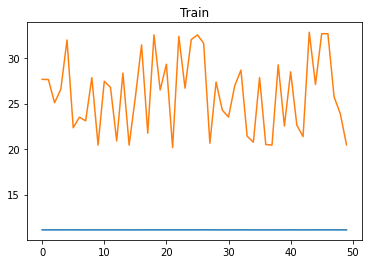

2/2 [==============================] - 1s 6ms/step


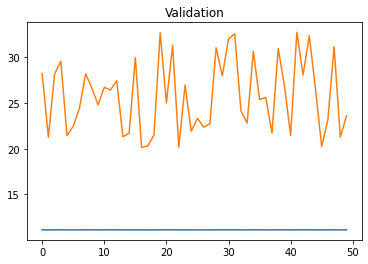

3/3 [==============================] - 0s 9ms/step


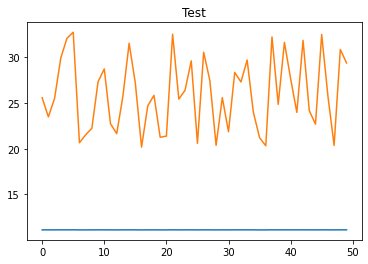

3/3 [==============================] - 0s 5ms/step


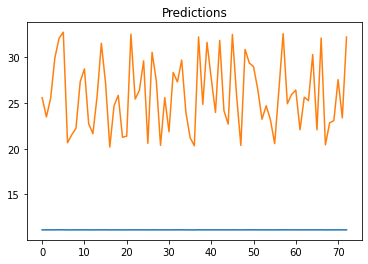

In [51]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [52]:
mavg_hybrid_lstm_rnn_gru_mse

233.35946145552424

# MSE

In [53]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [54]:
msedf

,Model,MSE,RMSE
0,cnn,143.387389,11.974447
1,rnn,376.396373,19.400937
2,gru,474.047373,21.772629
3,lstm,595.088157,24.394429
4,mvg_cnn,163.966792,12.804952
5,mvg_rnn,473.083163,21.750475
6,mvg_gru,490.296757,22.142646
7,mvg_lstm,486.592054,22.058832
8,auto_cnn,543.811444,23.319765
9,auto_rnn,512.307519,22.634211


In [55]:
msedf.to_csv("msedf.csv", index= False)

<AxesSubplot:xlabel='Model'>

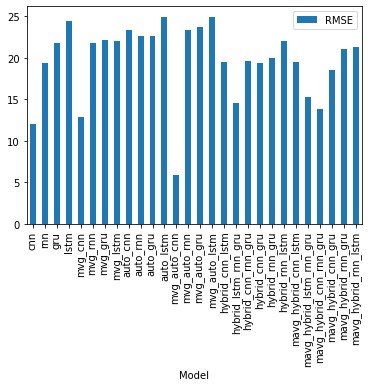

In [56]:
msedf.plot("Model", "RMSE", kind= "bar")

In [57]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)